In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
# import all lagged data
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_newest_lagged_added_stats.csv')

In [5]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [6]:
grouped_lagged_added_stats_ri = grouped_lagged_added_stats.reset_index(drop=True)

# _2(57) vs _4(100)

In [7]:
grouped_lagged_added_stats_ri_2 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==2]

In [7]:
grouped_lagged_added_stats_ri_2 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==2]

In [8]:
grouped_lagged_added_stats_ri_2

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
5           0.255814               0.139535               0.139535   
9           0.116279               0.255814               0.279070   
10          0.255814               0.116279               0.255814   
11          0.139535               0.255814               0.116279   
18          0.813953               0.162791               0.116279   
19          0.162791               0.813953               0.162791   
24          0.302326               0.139535               0.325581   
31          0.279070               1.000000               0.000000   
40          0.441860               0.558140               0.465116   
46          0.790698               0.093023               0.302326   
53          0.071429               0.027473               0.164835   
54          0.120879               0.071429               0.027473   
56          0.049451               0.164835               0.120879   
61          0.126374               0.076923               0.000000   
71          0.142857               0.137363               0.093407   
74          0.076923               0.065934               0.324176   
80          0.263889               0.041667               0.277778   
103         0.298507               0.119403               0.208955   
104         0.089552               0.298507               0.119403   
106         0.089552               0.059701               0.089552   
127         0.597015               0.567164               0.223881   
133         0.089109               0.366337               0.405941   
135         0.089109               0.049505               0.089109   
146         0.188119               0.415842               0.138614   
153         0.217822               0.267327               0.108911   
160         0.148515               0.039604               0.336634   
170         0.554455               0.069307               0.227723   
172         0.059406               0.584158               0.554455   
175         0.034783               0.000000               0.000000   
176         0.000000               0.034783               0.000000   
184         0.034783               0.026087               0.460870   
186         0.113043               0.069565               0.034783   
187         0.226087               0.113043               0.069565   
188         0.356522               0.226087               0.113043   
192         0.269565               0.965217               0.000000   
193         0.165217               0.269565               0.965217   
194         0.730435               0.165217               0.269565   
195         0.200000               0.730435               0.165217   
197         0.043478               0.147826               0.200000   
203         0.182609               0.182609               0.000000   
209         0.356522               0.200000               0.008696   
210         0.208696               0.356522               0.200000   
212         0.191304               1.000000               0.208696   
213         0.078261               0.191304               1.000000   
224         1.000000               0.229885               0.000000   
231         0.206897               0.172414               0.045977   
239         0.206897               0.137931               0.103448   
241         0.264368               0.137931               0.206897   
248         0.033333               0.061111               0.000000   
254         0.477778               0.088889               0.161111   
265         0.034314               0.053922               0.049020   
279         0.294118               0.029412               0.078431   
280         0.235294               0.294118               0.029412   
281         0.279412               0.235294               0.294118   
292         0.411765               0.088235               0.186275   
296         0.117925               0.089623               0.000000   
320         0.7

In [9]:
grouped_lagged_added_stats_ri_2['Binary'] = 0

In [10]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [11]:
grouped_lagged_added_stats_ri_4 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==4]

In [12]:
grouped_lagged_added_stats_ri_4

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
8           0.255814               0.279070               0.488372   
13          0.511628               0.139535               0.139535   
15          0.162791               0.093023               0.511628   
17          0.162791               0.116279               0.162791   
..               ...                    ...                    ...   
312         0.891509               0.103774               0.528302   
314         0.028302               0.023585               0.891509   
315         0.070755               0.028302               0.023585   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
8                 0.255814               0.139535              0.460563   
13                0.255814               0.116279              0.493775   
15                0.139535               0.139535              0.341940   
17                0.093023               0.511628              0.311462   
..                     ...                    ...                   ...   
312               0.066038               0.141509              1.000000   
314               0.103774               0.528302              0.059617   
315               0.891509               0.103774              0.135402   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
8                 0.431110               0.516920               0.470011   
13                0.261105               0.320118               0.378745   
15                0.111559               0.493775               0.261105   
17                0.275235               0.341940               0.111559   
..                     ...                    ...                    ...   
312               0.161598               0.648750               0.096689   
314               0.074648               1.000000               0.161598   
315               0.059617               0.074648               1.000000   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
8                 0.212414  ...                      2.569444   
13                0.263726  ...                      2.027778   
15                0.320118  ...                      2.486111   
17                0.493775  ...                      2.472222   
..                     ...  ...                           ...   
312               0.133200  ...                      1.926045   
314               0.648750  ...                      1.826367   
315               0.161598  ...                      1.363344   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
8                             0.402778                           0.458333   
13                            0.506944                           0.449074   
15                            0.569444                           0.592593   
17                            0.347222                           0.393519   
..                                 ...                                ...   
312                           

In [13]:
grouped_lagged_added_stats_ri_4['Binary'] = 1

In [14]:
grouped_lagged_binary24 = pd.concat([grouped_lagged_added_stats_ri_2, grouped_lagged_added_stats_ri_4])


In [15]:
grouped_lagged_binary24_ri = grouped_lagged_binary24.reset_index(drop=True)

In [16]:
x_binary_main24 = grouped_lagged_binary24_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [17]:
x_binary_main24.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [18]:
x_bin24 = x_binary_main24.values

In [19]:
y_bin24 = grouped_lagged_binary24_ri['Binary'].values

In [20]:
X_train_bin24, X_test_bin24, y_train_bin24, y_test_bin24 = train_test_split(x_bin24, y_bin24, test_size=0.2, random_state=5)

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [22]:
mod_bin24 =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=20, random_state=54)
mod_bin24.fit(X_train_bin24, y_train_bin24)
y_pred_bin24=mod_bin24.predict(X_test_bin24)

In [23]:
mod_bin24.n_iter_

100

In [24]:
target_names = ['0', '1']

In [25]:
f1_sc_bin24 = f1_score(y_test_bin24, y_pred_bin24, average = 'weighted')
f1_sc_bin24

0.7845345345345346

In [26]:
p_sc_bin24 = precision_score(y_test_bin24, y_pred_bin24, average = 'weighted')
p_sc_bin24

0.8014705882352942

In [27]:
cf_matrix_bin24 = confusion_matrix(y_test_bin24, y_pred_bin24)
cf_matrix_bin24

array([[10,  2],
       [ 5, 15]], dtype=int64)

In [28]:
print(classification_report(y_test_bin24, y_pred_bin24, target_names=target_names))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.88      0.75      0.81        20

    accuracy                           0.78        32
   macro avg       0.77      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32



In [29]:
from sklearn.inspection import permutation_importance

In [30]:
def plot_permutation_importance(clf, X, y, col, ax):
    result = permutation_importance(clf, X, y, n_repeats=30, random_state=0, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    # `labels` argument in boxplot is deprecated in matplotlib 3.9 and has been
    # renamed to `tick_labels`. The following code handles this, but as a
    # scikit-learn user you probably can write simpler code by using `labels=...`
    # (matplotlib < 3.9) or `tick_labels=...` (matplotlib >= 3.9).
    tick_labels_parameter_name = (
        "tick_labels"
        #if parse_version(matplotlib.__version__) >= parse_version("3.9")
        #else "labels"
    )
    tick_labels_dict = {tick_labels_parameter_name: col.columns[perm_sorted_idx]}
    ax.boxplot(result.importances[perm_sorted_idx].T, vert=False)
    ax.set_yticklabels(col.columns[perm_sorted_idx])
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

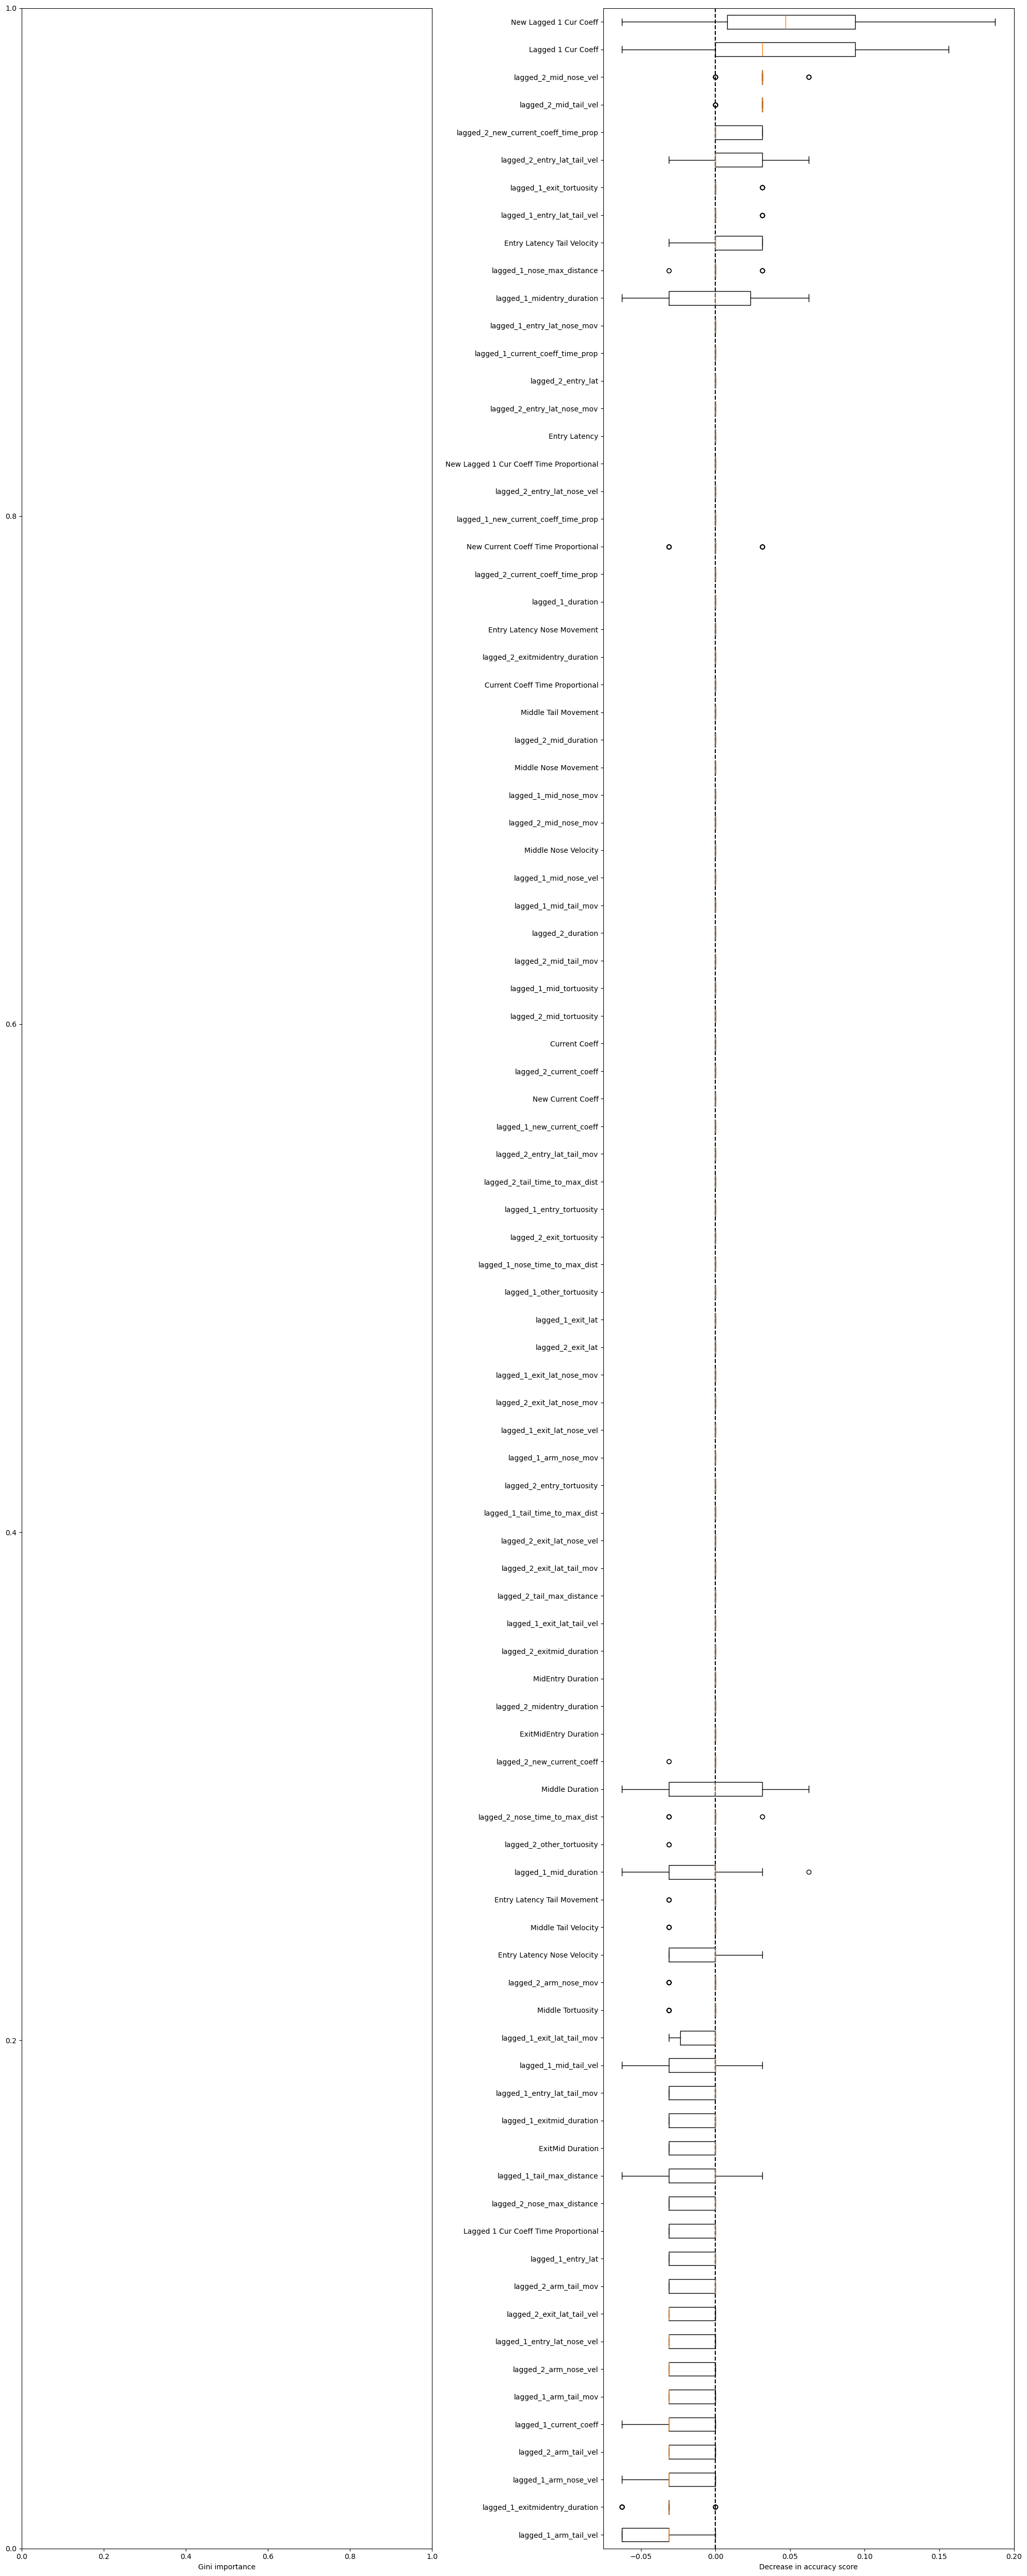

In [31]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_bin24, X_test_bin24, y_test_bin24, x_binary_main24,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [32]:
# try tuning

In [33]:
mod_bin24TT = HistGradientBoostingClassifier(learning_rate = 0.01, n_iter_no_change=5, min_samples_leaf = 10, random_state=54)

In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate

scoring = ["accuracy", "balanced_accuracy"]
cv_scores = [
    "train_accuracy",
    "test_accuracy",
    "train_balanced_accuracy",
    "test_balanced_accuracy",
]
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
cv_results_vanilla_model = pd.DataFrame(
    cross_validate(
        mod_bin24TT,
        x_bin24,
        y_bin24,
        scoring=scoring,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_vanilla_model[cv_scores].aggregate(["mean", "std"]).T

mean       std
train_accuracy           0.971983  0.008962
test_accuracy            0.729375  0.090777
train_balanced_accuracy  0.961804  0.011801
test_balanced_accuracy   0.693455  0.099224

In [35]:
from sklearn.model_selection import TunedThresholdClassifierCV

tuned_model = TunedThresholdClassifierCV(estimator=mod_bin24TT, scoring="balanced_accuracy")
cv_results_tuned_model = pd.DataFrame(
    cross_validate(
        tuned_model,
        x_bin24,
        y_bin24,
        scoring=scoring,
        cv=cv,
        return_train_score=True,
        return_estimator=True,
    )
)
cv_results_tuned_model[cv_scores].aggregate(["mean", "std"]).T

mean       std
train_accuracy           0.891397  0.049977
test_accuracy            0.753891  0.075465
train_balanced_accuracy  0.907948  0.035912
test_balanced_accuracy   0.779742  0.075434

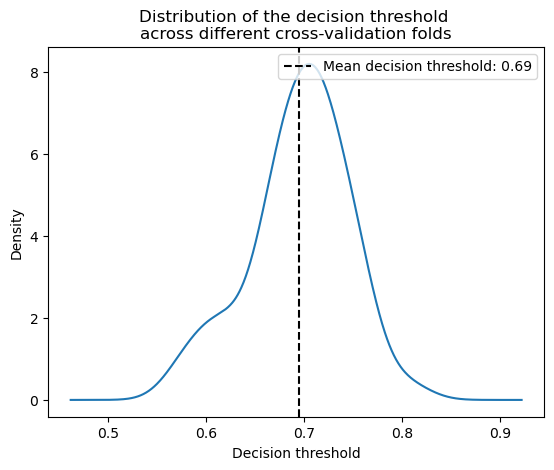

In [36]:
decision_threshold = pd.Series(
    [est.best_threshold_ for est in cv_results_tuned_model["estimator"]],
)
ax = decision_threshold.plot.kde()
ax.axvline(
    decision_threshold.mean(),
    color="k",
    linestyle="--",
    label=f"Mean decision threshold: {decision_threshold.mean():.2f}",
)
ax.set_xlabel("Decision threshold")
ax.legend(loc="upper right")
_ = ax.set_title(
    "Distribution of the decision threshold \nacross different cross-validation folds"
)

In [37]:
# try tuning part2

In [38]:
X_train_bin24TT2, X_test_bin24TT2, y_train_bin24TT2, y_test_bin24TT2 = train_test_split(x_bin24, y_bin24, stratify=y_bin24, random_state=5)

In [39]:
sum(y_test_bin24TT2==1)

25

In [40]:
pos_label, neg_label = 0,1 # dont want to misclassify 2s as 4s

In [41]:
def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    print(cm)
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr

In [42]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [43]:
tpr_score = recall_score  # TPR and recall are the same metric
scoring = {
    "precision": make_scorer(precision_score, pos_label=pos_label),
    "recall": make_scorer(recall_score, pos_label=pos_label),
    "fpr": make_scorer(fpr_score, neg_label=neg_label, pos_label=pos_label),
    "tpr": make_scorer(tpr_score, pos_label=pos_label),
}

In [44]:
def credit_gain_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    print(cm)
    gain_matrix = np.array(
        [
            [0, -1],  # -1 gain for false positives (when a 4 is classified as 2)
            [-5, 0],  # -5 gain for false negatives (when a 2 is classified as 4)
        ]
    )
    return np.sum(cm * gain_matrix)


scoring["credit_gain"] = make_scorer(
    credit_gain_score, neg_label=neg_label, pos_label=pos_label
)

In [45]:
mod_bin24TT2 = HistGradientBoostingClassifier(learning_rate = 0.01, n_iter_no_change=5, min_samples_leaf = 10, random_state=54)

In [46]:
mod_bin24TT2.fit(X_train_bin24TT2, y_train_bin24TT2)

HistGradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=10,
                               n_iter_no_change=5, random_state=54)

[[24  1]
 [11  4]]


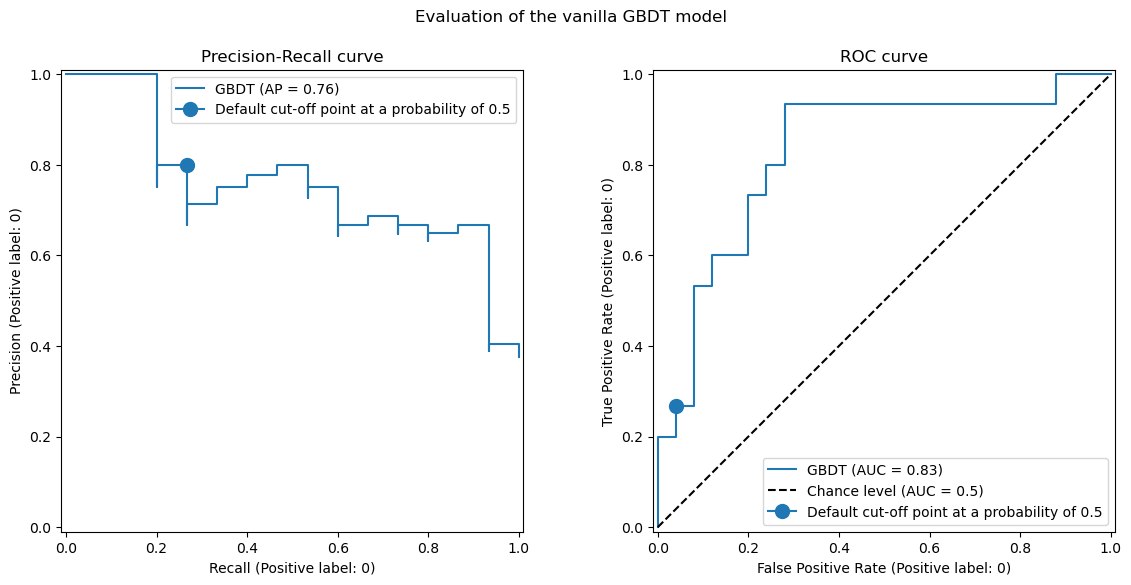

In [47]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

PrecisionRecallDisplay.from_estimator(
    mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2, pos_label=pos_label, ax=axs[0], name="GBDT"
)
axs[0].plot(
    scoring["recall"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    scoring["precision"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5",
)
axs[0].set_title("Precision-Recall curve")
axs[0].legend()

RocCurveDisplay.from_estimator(
    mod_bin24TT2,
    X_test_bin24TT2,
    y_test_bin24TT2,
    pos_label=pos_label,
    ax=axs[1],
    name="GBDT",
    plot_chance_level=True,
)
axs[1].plot(
    scoring["fpr"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    scoring["tpr"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5",
)
axs[1].set_title("ROC curve")
axs[1].legend()
_ = fig.suptitle("Evaluation of the vanilla GBDT model")

In [48]:
print(f"Business defined metric: {scoring['credit_gain'](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2)}")

[[24  1]
 [11  4]]
Business defined metric: -56


In [49]:

tuned_model_bin24TT2 = TunedThresholdClassifierCV(
    estimator=mod_bin24TT2,
    scoring=scoring["credit_gain"],
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_bin24TT2.fit(X_train_bin24TT2, y_train_bin24TT2)
print(f"{tuned_model_bin24TT2.best_threshold_=:0.2f}")

[[ 0 15]
 [ 0  9]]
[[ 3 12]
 [ 0  9]]
[[ 3 12]
 [ 0  9]]
[[ 3 12]
 [ 0  9]]
[[ 3 12]
 [ 0  9]]
[[ 4 11]
 [ 0  9]]
[[7 8]
 [0 9]]
[[7 8]
 [0 9]]
[[7 8]
 [0 9]]
[[9 6]
 [0 9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[10  5]
 [ 0  9]]
[[11  4]
 [ 0  9]]
[[11  4]
 [ 0  9]]
[[11  4]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[12  3]
 [ 1  8]]
[[13  2]
 [ 1  8]]
[[13  2]
 [ 1  8]]
[[13  2]
 [ 1  8]]
[[13  2]
 [ 1  8]]
[[14  1]
 [ 1  8]]
[[14  1]
 [ 1  8]]
[[14  1]
 [ 1  8]]
[[14  1]
 [ 1  8]]
[[14  1]
 [ 1  8]]
[[15  0]
 [ 1  8]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 2  7]]
[[15  0]
 [ 3  6]]
[[15  0]
 [ 4  5]]
[[15  0]
 [ 4  5]]
[[15  0]
 [ 4  5]]
[[15  0]
 [ 4  5]]
[[15  0]


In [50]:
def plot_roc_pr_curves(vanilla_model, tuned_model, *, title):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

    linestyles = ("dashed", "dotted")
    markerstyles = ("o", ">")
    colors = ("tab:blue", "tab:orange")
    names = ("Vanilla GBDT", "Tuned GBDT")
    for idx, (est, linestyle, marker, color, name) in enumerate(
        zip((vanilla_model, tuned_model), linestyles, markerstyles, colors, names)
    ):
        decision_threshold = getattr(est, "best_threshold_", 0.5)
        PrecisionRecallDisplay.from_estimator(
            est,
            X_test_bin24TT2,
            y_test_bin24TT2,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[0],
            name=name,
        )
        axs[0].plot(
            scoring["recall"](est, X_test_bin24TT2, y_test_bin24TT2),
            scoring["precision"](est, X_test_bin24TT2, y_test_bin24TT2),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )
        RocCurveDisplay.from_estimator(
            est,
            X_test_bin24TT2,
            y_test_bin24TT2,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[1],
            name=name,
            plot_chance_level=idx == 1,
        )
        axs[1].plot(
            scoring["fpr"](est, X_test_bin24TT2, y_test_bin24TT2),
            scoring["tpr"](est, X_test_bin24TT2, y_test_bin24TT2),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )

    axs[0].set_title("Precision-Recall curve")
    axs[0].legend()
    axs[1].set_title("ROC curve")
    axs[1].legend()

    axs[2].plot(
        tuned_model.cv_results_["thresholds"],
        tuned_model.cv_results_["scores"],
        color="tab:orange",
    )
    axs[2].plot(
        tuned_model.best_threshold_,
        tuned_model.best_score_,
        "o",
        markersize=10,
        color="tab:orange",
        label="Optimal cut-off point for the business metric",
    )
    axs[2].legend()
    axs[2].set_xlabel("Decision threshold (probability)")
    axs[2].set_ylabel("Objective score (using cost-matrix)")
    axs[2].set_title("Objective score as a function of the decision threshold")
    fig.suptitle(title)

[[24  1]
 [11  4]]
[[16  9]
 [ 1 14]]


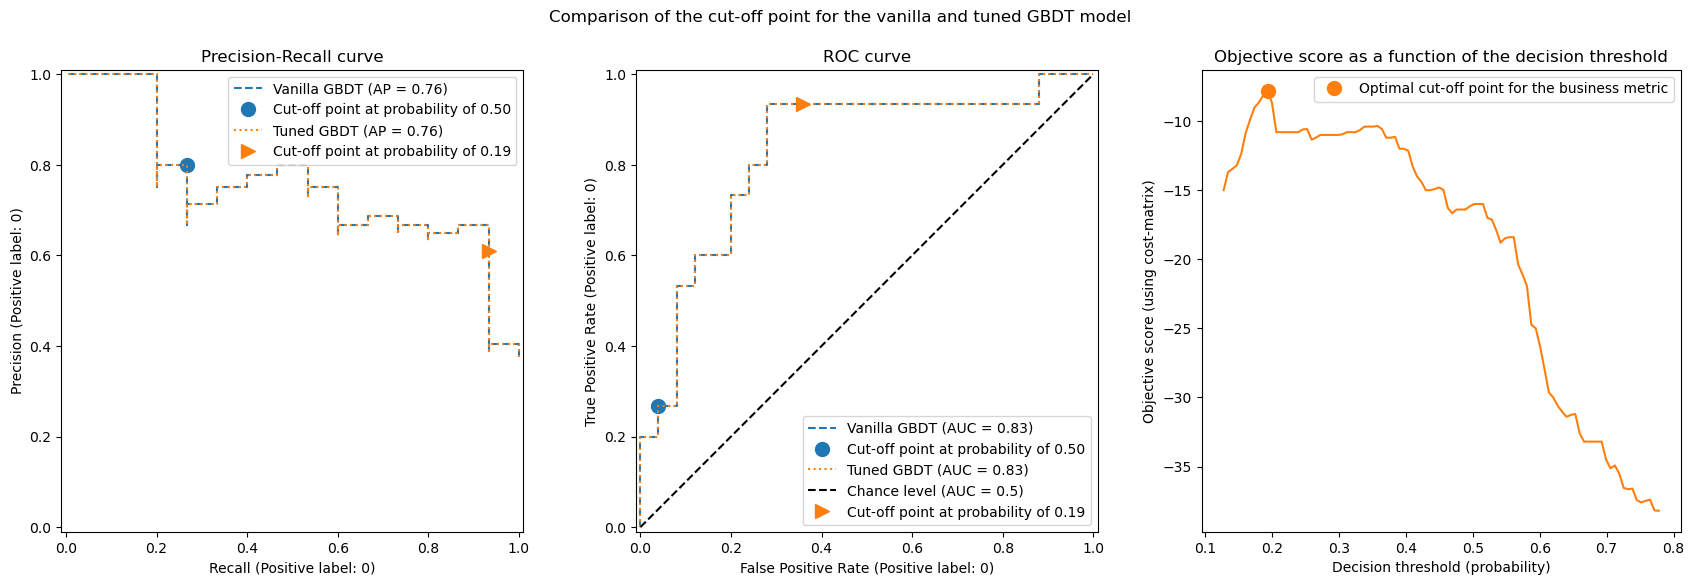

In [51]:
title = "Comparison of the cut-off point for the vanilla and tuned GBDT model"
plot_roc_pr_curves(mod_bin24TT2, tuned_model_bin24TT2, title=title)

In [52]:
print(f"Business defined metric: {scoring['credit_gain'](tuned_model_bin24TT2, X_test_bin24TT2, y_test_bin24TT2)}")

[[16  9]
 [ 1 14]]
Business defined metric: -14


In [53]:
X_test_bin24TT2.shape

(40, 92)

In [54]:
y_test_bin24TT2.shape

(40,)

In [55]:
sum(y_test_bin24TT2==0)

15

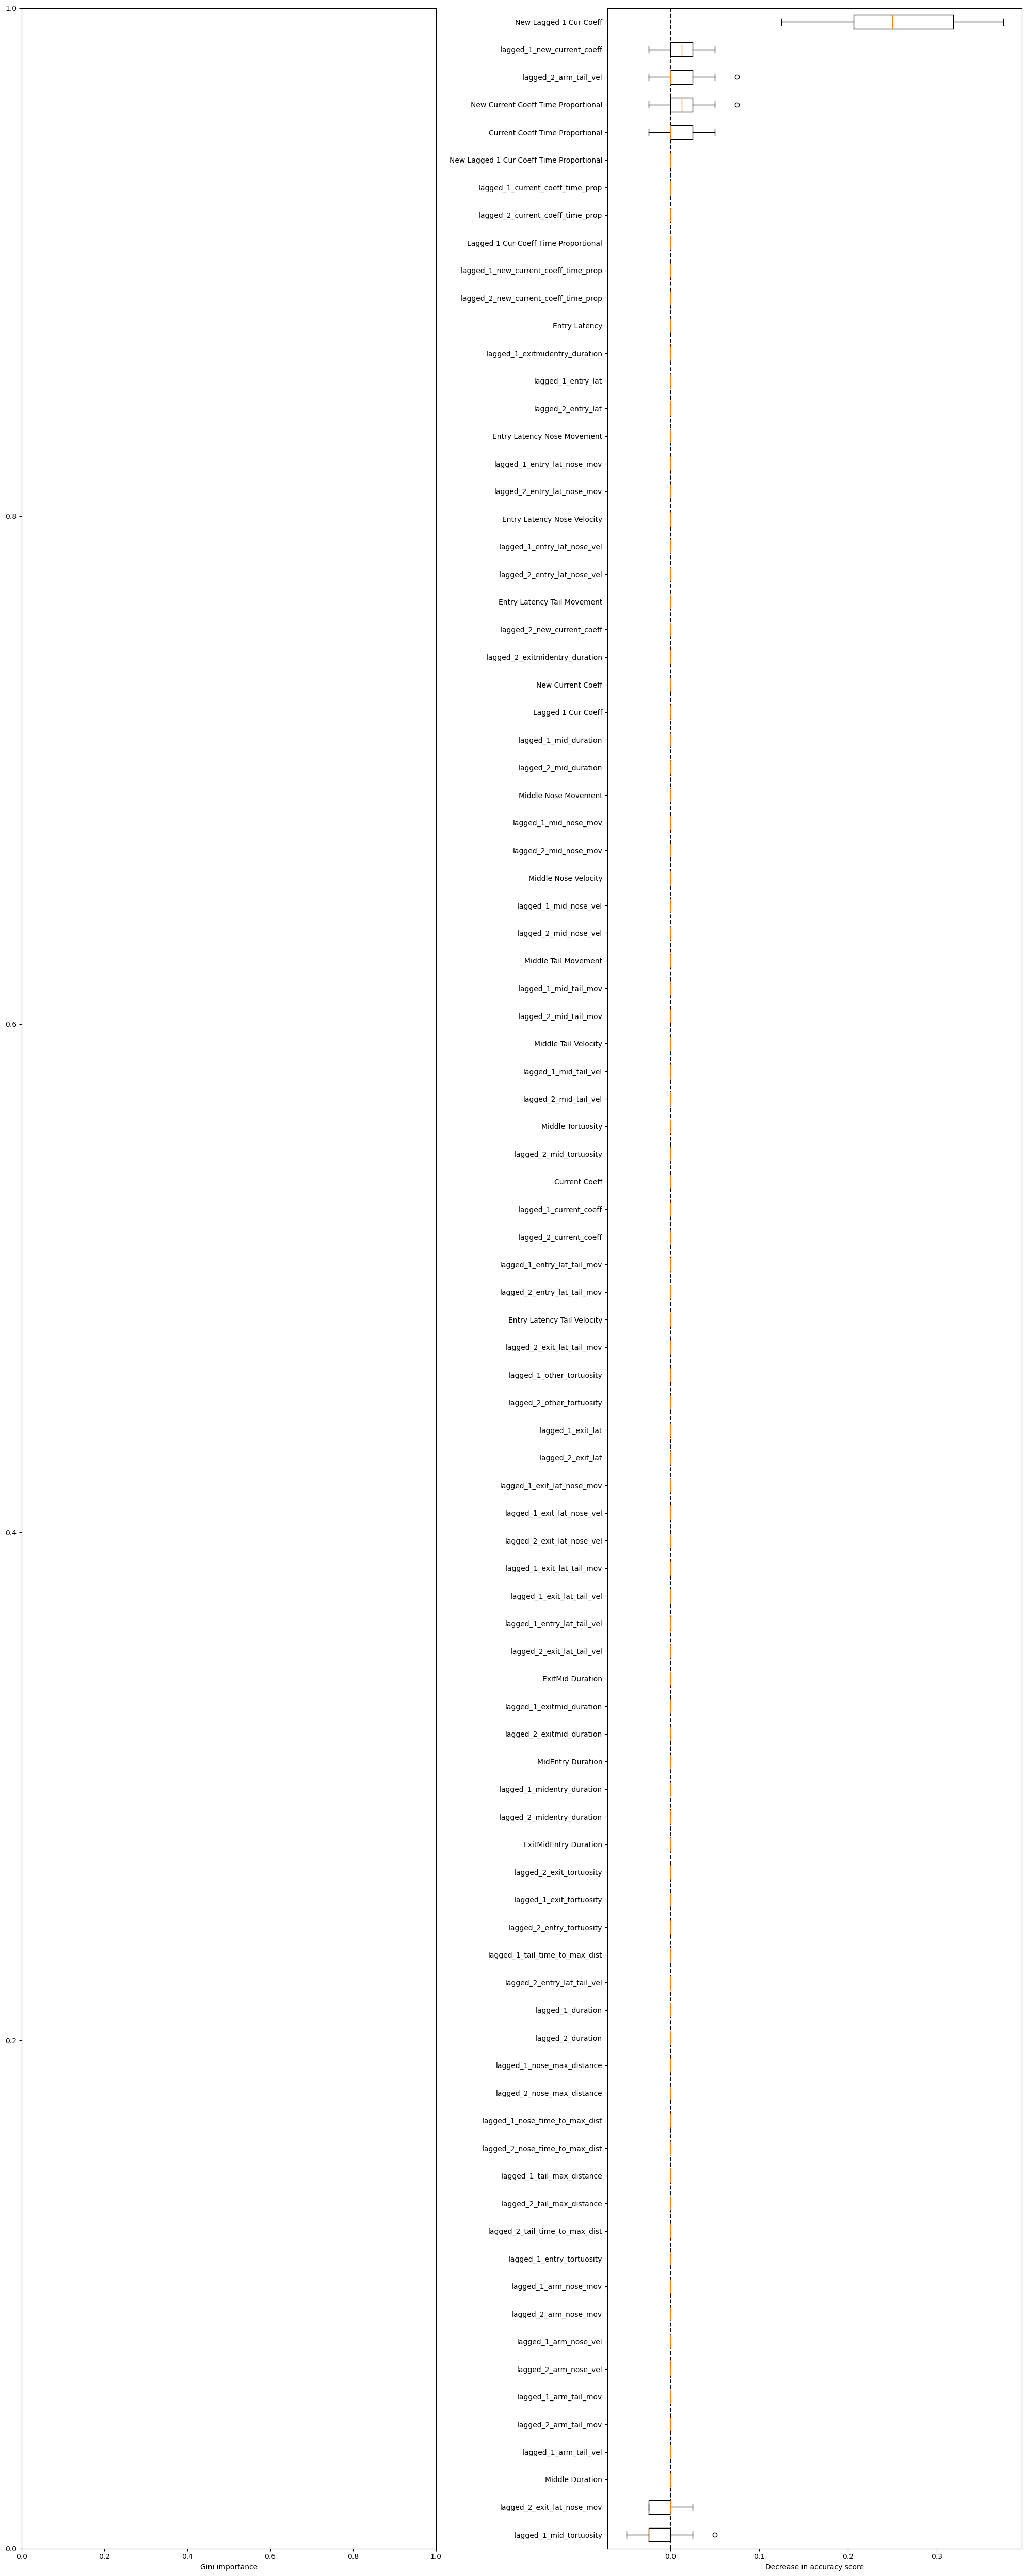

In [56]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(tuned_model_bin24TT2, X_test_bin24TT2, y_test_bin24TT2, x_binary_main24,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [ ]:
# same with gradientboostingclassifier

In [57]:
mod_bin24gb =  GradientBoostingClassifier(n_estimators = 1000, learning_rate = 0.2, validation_fraction=0.1, n_iter_no_change=20, random_state=54)
mod_bin24gb.fit(X_train_bin24, y_train_bin24)
y_pred_bin24gb=mod_bin24gb.predict(X_test_bin24)

In [58]:
mod_bin24gb.n_estimators_

22

In [59]:
target_names = ['0', '1']

In [60]:
f1_sc_bin24gb = f1_score(y_test_bin24, y_pred_bin24gb, average = 'weighted')
f1_sc_bin24gb

0.753968253968254

In [61]:
p_sc_bin24gb = precision_score(y_test_bin24, y_pred_bin24gb, average = 'weighted')
p_sc_bin24gb

0.78125

In [62]:
cf_matrix_bin24gb = confusion_matrix(y_test_bin24, y_pred_bin24gb)
cf_matrix_bin24gb

array([[10,  2],
       [ 6, 14]], dtype=int64)

In [63]:
print(classification_report(y_test_bin24, y_pred_bin24gb, target_names=target_names))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.88      0.70      0.78        20

    accuracy                           0.75        32
   macro avg       0.75      0.77      0.75        32
weighted avg       0.78      0.75      0.75        32



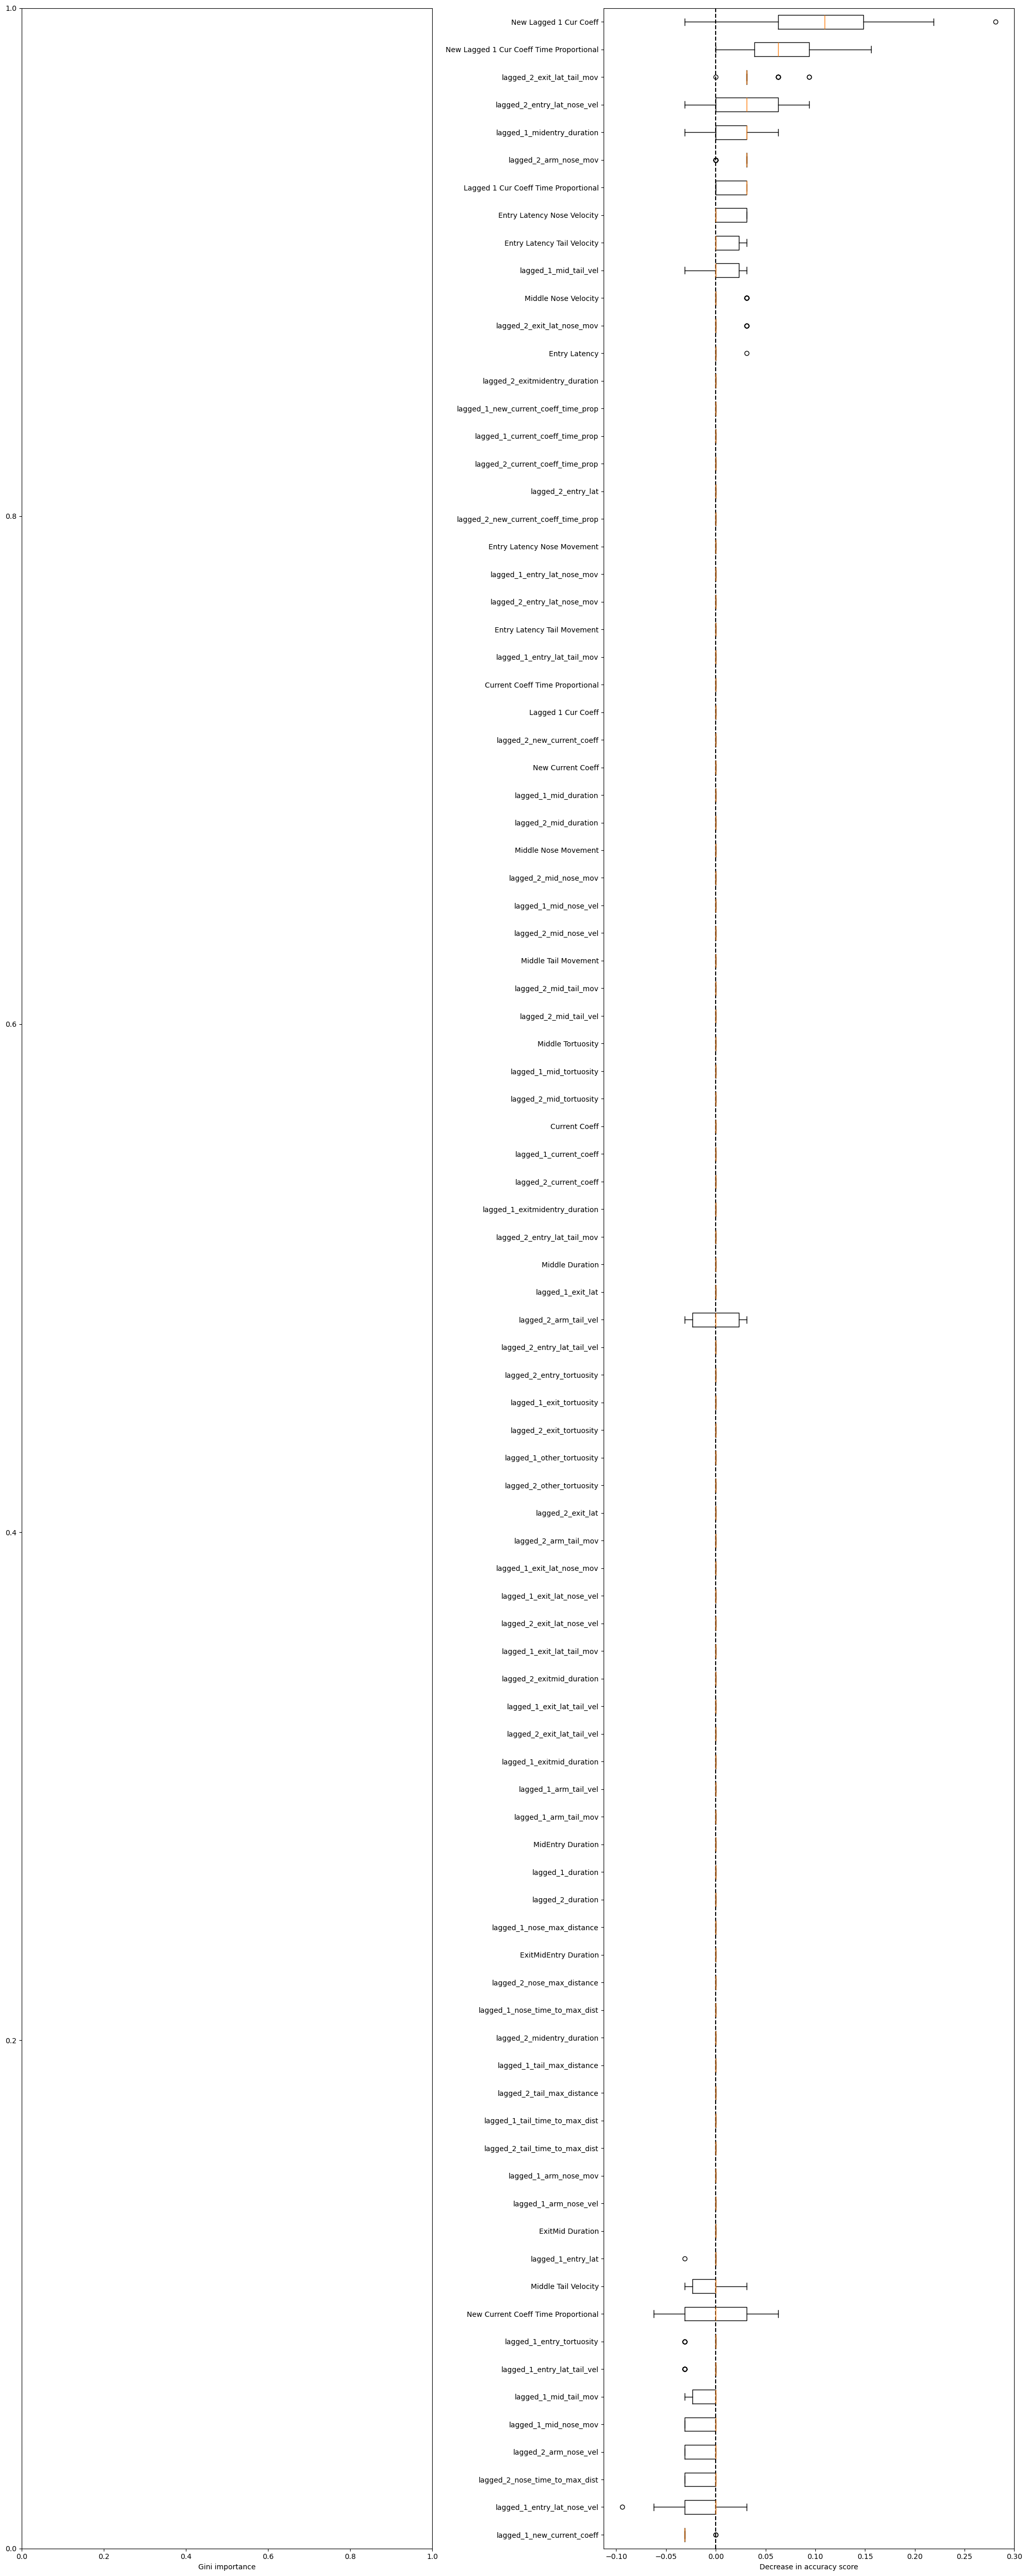

In [59]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_bin24gb, X_test_bin24, y_test_bin24, x_binary_main24,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [ ]:
# try tuning GRADIENT BOOSTING CLF 2s vs 4s

In [ ]:
X_train_bin24TT2, X_test_bin24TT2, y_train_bin24TT2, y_test_bin24TT2 = train_test_split(x_bin24, y_bin24, stratify=y_bin24, random_state=5)

In [ ]:
sum(y_test_bin24TT2==1)

In [ ]:
pos_label, neg_label = 0,1 # dont want to misclassify 2s as 4s

In [ ]:
def fpr_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    print(cm)
    tn, fp, _, _ = cm.ravel()
    tnr = tn / (tn + fp)
    return 1 - tnr

In [ ]:
from sklearn.metrics import make_scorer, precision_score, recall_score

In [ ]:
tpr_score = recall_score  # TPR and recall are the same metric
scoring = {
    "precision": make_scorer(precision_score, pos_label=pos_label),
    "recall": make_scorer(recall_score, pos_label=pos_label),
    "fpr": make_scorer(fpr_score, neg_label=neg_label, pos_label=pos_label),
    "tpr": make_scorer(tpr_score, pos_label=pos_label),
}

In [ ]:
def credit_gain_score(y, y_pred, neg_label, pos_label):
    cm = confusion_matrix(y, y_pred, labels=[neg_label, pos_label])
    print(cm)
    gain_matrix = np.array(
        [
            [0, -1],  # -1 gain for false positives (when a 4 is classified as 2)
            [-5, 0],  # -5 gain for false negatives (when a 2 is classified as 4)
        ]
    )
    return np.sum(cm * gain_matrix)


scoring["credit_gain"] = make_scorer(
    credit_gain_score, neg_label=neg_label, pos_label=pos_label
)

In [ ]:
mod_bin24TT2 = HistGradientBoostingClassifier(learning_rate = 0.01, n_iter_no_change=5, min_samples_leaf = 10, random_state=54)

In [ ]:
mod_bin24TT2.fit(X_train_bin24TT2, y_train_bin24TT2)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

PrecisionRecallDisplay.from_estimator(
    mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2, pos_label=pos_label, ax=axs[0], name="GBDT"
)
axs[0].plot(
    scoring["recall"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    scoring["precision"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5",
)
axs[0].set_title("Precision-Recall curve")
axs[0].legend()

RocCurveDisplay.from_estimator(
    mod_bin24TT2,
    X_test_bin24TT2,
    y_test_bin24TT2,
    pos_label=pos_label,
    ax=axs[1],
    name="GBDT",
    plot_chance_level=True,
)
axs[1].plot(
    scoring["fpr"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    scoring["tpr"](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2),
    marker="o",
    markersize=10,
    color="tab:blue",
    label="Default cut-off point at a probability of 0.5",
)
axs[1].set_title("ROC curve")
axs[1].legend()
_ = fig.suptitle("Evaluation of the vanilla GBDT model")

In [ ]:
print(f"Business defined metric: {scoring['credit_gain'](mod_bin24TT2, X_test_bin24TT2, y_test_bin24TT2)}")

In [ ]:

tuned_model_bin24TT2 = TunedThresholdClassifierCV(
    estimator=mod_bin24TT2,
    scoring=scoring["credit_gain"],
    store_cv_results=True,  # necessary to inspect all results
)
tuned_model_bin24TT2.fit(X_train_bin24TT2, y_train_bin24TT2)
print(f"{tuned_model_bin24TT2.best_threshold_=:0.2f}")

In [ ]:
def plot_roc_pr_curves(vanilla_model, tuned_model, *, title):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))

    linestyles = ("dashed", "dotted")
    markerstyles = ("o", ">")
    colors = ("tab:blue", "tab:orange")
    names = ("Vanilla GBDT", "Tuned GBDT")
    for idx, (est, linestyle, marker, color, name) in enumerate(
        zip((vanilla_model, tuned_model), linestyles, markerstyles, colors, names)
    ):
        decision_threshold = getattr(est, "best_threshold_", 0.5)
        PrecisionRecallDisplay.from_estimator(
            est,
            X_test_bin24TT2,
            y_test_bin24TT2,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[0],
            name=name,
        )
        axs[0].plot(
            scoring["recall"](est, X_test_bin24TT2, y_test_bin24TT2),
            scoring["precision"](est, X_test_bin24TT2, y_test_bin24TT2),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )
        RocCurveDisplay.from_estimator(
            est,
            X_test_bin24TT2,
            y_test_bin24TT2,
            pos_label=pos_label,
            linestyle=linestyle,
            color=color,
            ax=axs[1],
            name=name,
            plot_chance_level=idx == 1,
        )
        axs[1].plot(
            scoring["fpr"](est, X_test_bin24TT2, y_test_bin24TT2),
            scoring["tpr"](est, X_test_bin24TT2, y_test_bin24TT2),
            marker,
            markersize=10,
            color=color,
            label=f"Cut-off point at probability of {decision_threshold:.2f}",
        )

    axs[0].set_title("Precision-Recall curve")
    axs[0].legend()
    axs[1].set_title("ROC curve")
    axs[1].legend()

    axs[2].plot(
        tuned_model.cv_results_["thresholds"],
        tuned_model.cv_results_["scores"],
        color="tab:orange",
    )
    axs[2].plot(
        tuned_model.best_threshold_,
        tuned_model.best_score_,
        "o",
        markersize=10,
        color="tab:orange",
        label="Optimal cut-off point for the business metric",
    )
    axs[2].legend()
    axs[2].set_xlabel("Decision threshold (probability)")
    axs[2].set_ylabel("Objective score (using cost-matrix)")
    axs[2].set_title("Objective score as a function of the decision threshold")
    fig.suptitle(title)

In [ ]:
title = "Comparison of the cut-off point for the vanilla and tuned GBDT model"
plot_roc_pr_curves(mod_bin24TT2, tuned_model_bin24TT2, title=title)

In [ ]:
print(f"Business defined metric: {scoring['credit_gain'](tuned_model_bin24TT2, X_test_bin24TT2, y_test_bin24TT2)}")

In [ ]:
X_test_bin24TT2.shape

In [ ]:
y_test_bin24TT2.shape

In [ ]:
sum(y_test_bin24TT2==0)

In [ ]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(tuned_model_bin24TT2, X_test_bin24TT2, y_test_bin24TT2, x_binary_main24,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [216]:
grouped_lagged_added_stats_ri_2 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==2]

In [217]:
grouped_lagged_added_stats_ri_2['Binary'] = 0

In [218]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [219]:
grouped_lagged_added_stats_ri_5 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==5]

In [220]:
grouped_lagged_added_stats_ri_5['Binary'] = 1

In [221]:
grouped_lagged_binary5 = pd.concat([grouped_lagged_added_stats_ri_2, grouped_lagged_added_stats_ri_5])


In [222]:
grouped_lagged_binary5_ri = grouped_lagged_binary5.reset_index(drop=True)

In [223]:
x_binary_main5 = grouped_lagged_binary5.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [224]:
x_binary_main5.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [225]:
x_bin5 = x_binary_main5.values

In [226]:
y_bin5 = grouped_lagged_binary5_ri['Binary'].values

In [227]:
X_train_bin5, X_test_bin5, y_train_bin5, y_test_bin5 = train_test_split(x_bin5, y_bin5, test_size=0.2, random_state=5)

In [228]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [229]:
mod_bin5 =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=20, random_state=54)
mod_bin5.fit(X_train_bin5, y_train_bin5)
y_pred_bin5=mod_bin5.predict(X_test_bin5)

In [230]:
mod_bin5.n_iter_

100

In [231]:
target_names = ['0', '1']

In [232]:
f1_sc_bin5 = f1_score(y_test_bin5, y_pred_bin5, average = 'weighted')
f1_sc_bin5

0.8181818181818182

In [233]:
p_sc_bin5 = precision_score(y_test_bin5, y_pred_bin5, average = 'weighted')
p_sc_bin5

0.8181818181818182

In [234]:
cf_matrix_bin5 = confusion_matrix(y_test_bin5, y_pred_bin5)
cf_matrix_bin5

array([[11,  2],
       [ 2,  7]], dtype=int64)

In [235]:
print(classification_report(y_test_bin5, y_pred_bin5, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.78      0.78      0.78         9

    accuracy                           0.82        22
   macro avg       0.81      0.81      0.81        22
weighted avg       0.82      0.82      0.82        22



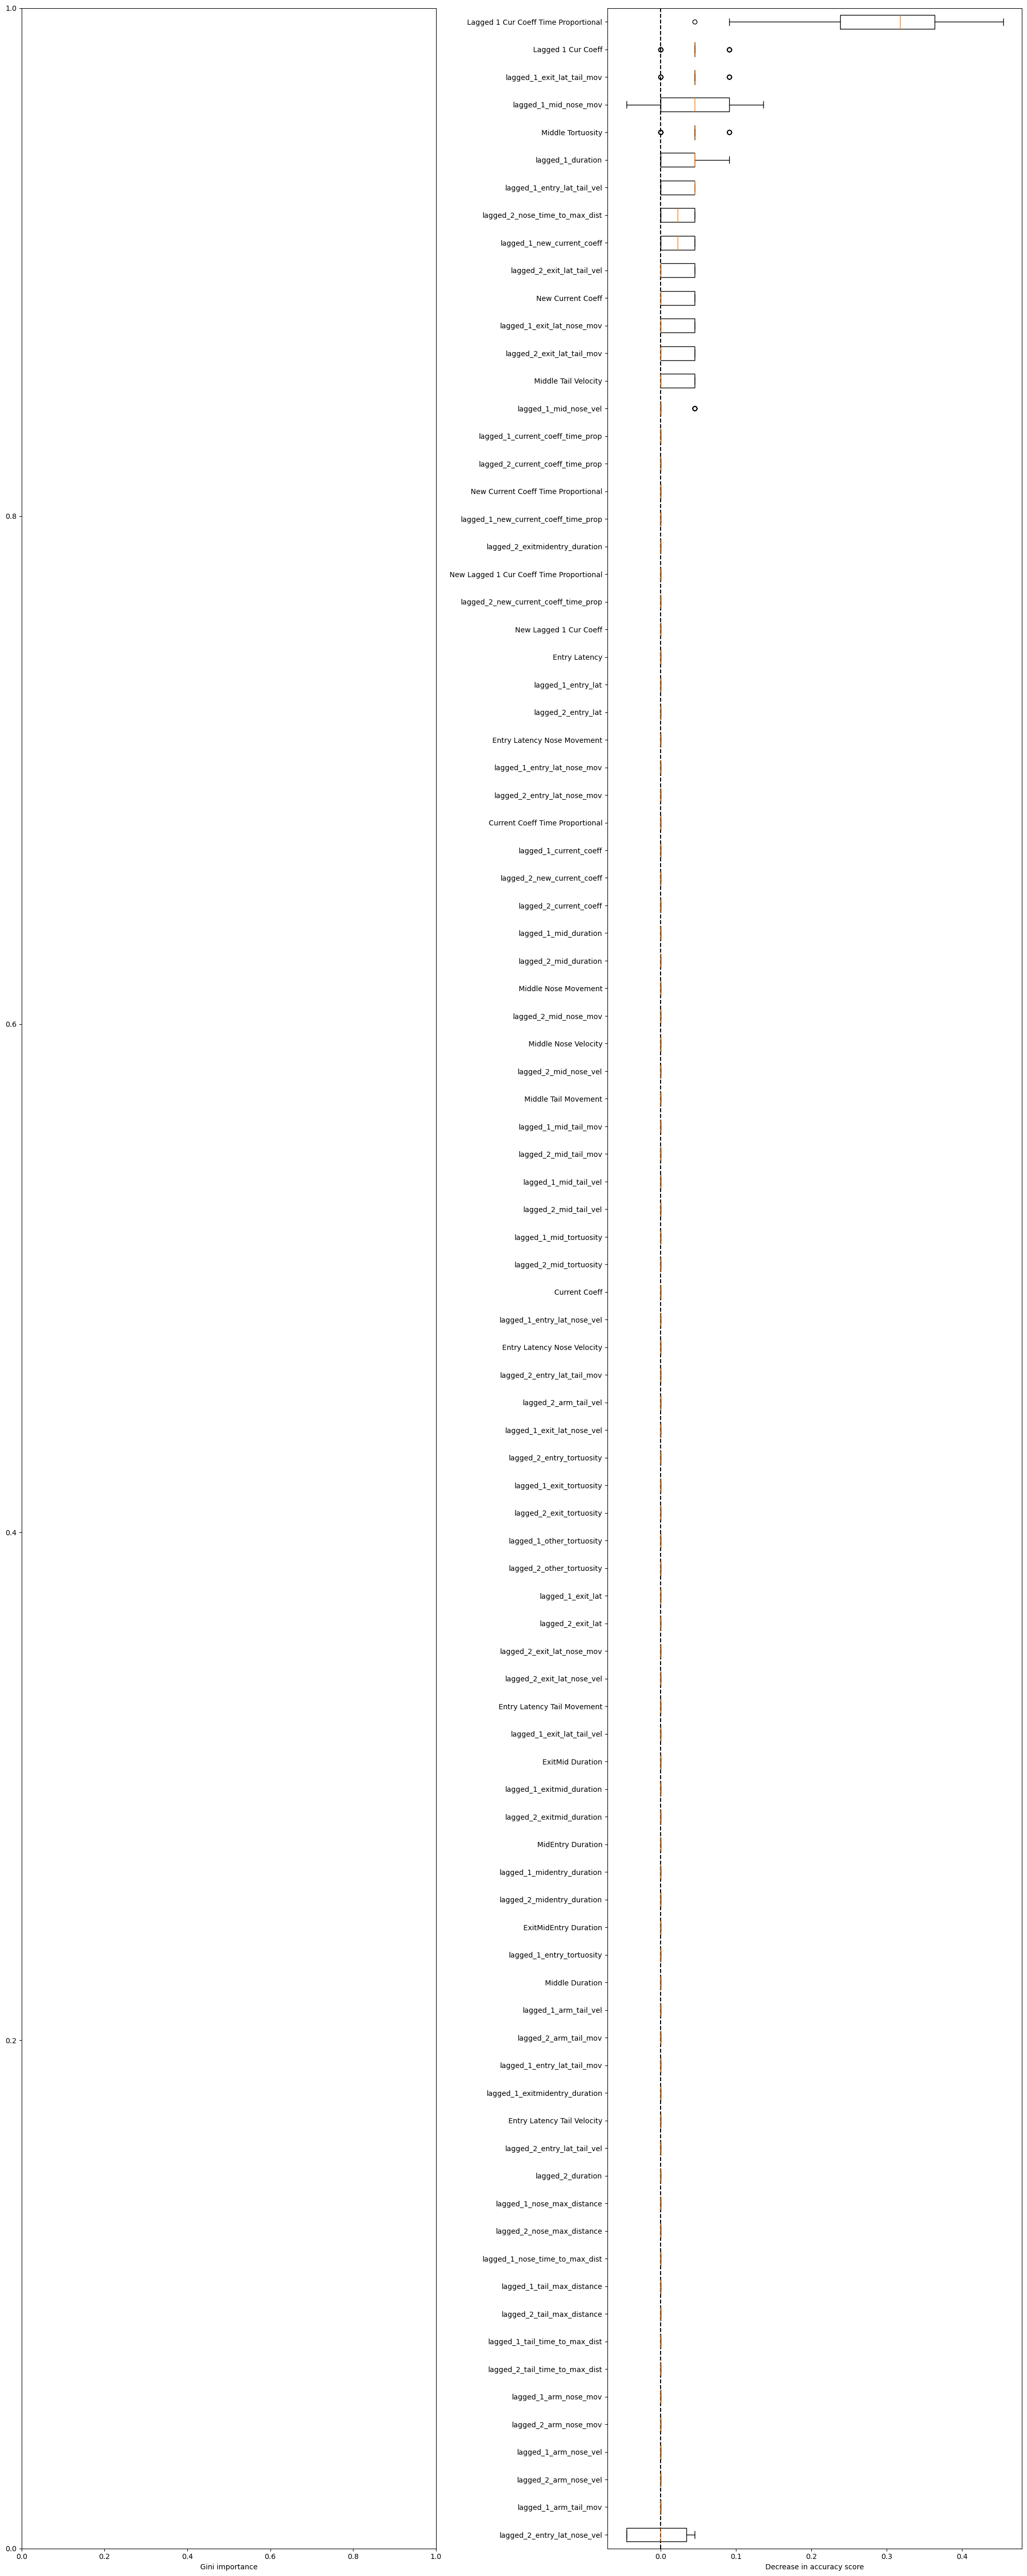

In [236]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_bin5, X_test_bin5, y_test_bin5, x_binary_main5,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

In [262]:
len(grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==5) & (grouped_lagged_added_stats_ri['lagged_1_choice_ago']==5)])

15

In [263]:
grouped_lagged_added_stats_ri_low = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2) | ((grouped_lagged_added_stats_ri['Choice Output']==3) & (grouped_lagged_added_stats_ri['lagged_1_choice_ago']>2))]

In [264]:
grouped_lagged_added_stats_ri_low

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
5           0.255814               0.139535               0.139535   
..               ...                    ...                    ...   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   
320         0.759434               0.216981               0.150943   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
5                 0.279070               0.302326              0.470011   
..                     ...                    ...                   ...   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   
320               0.004717               0.009434              0.833382   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
5                 0.212414               0.226293               0.239721   
..                     ...                    ...                    ...   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   
320               0.342442               0.224511               0.016390   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
5                 0.291543  ...                      2.569444   
..                     ...  ...                           ...   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   
320               0.029302  ...                      1.649518   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
5                             0.597222                           0.541667   
..                                 ...                                ...   
298                           

In [265]:
grouped_lagged_added_stats_ri_low['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\24646402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_low['Binary'] = 0


In [239]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [871]:
grouped_lagged_added_stats_ri_high = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3) | ((grouped_lagged_added_stats_ri['Choice Output']==3) & (grouped_lagged_added_stats_ri['lagged_1_choice_ago']==2))]

In [872]:
grouped_lagged_added_stats_ri_high

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
6           0.488372               0.255814               0.139535   
8           0.255814               0.279070               0.488372   
12          0.139535               0.139535               0.255814   
13          0.511628               0.139535               0.139535   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
6                 0.139535               0.279070              0.516920   
8                 0.255814               0.139535              0.460563   
12                0.116279               0.255814              0.261105   
13                0.255814               0.116279              0.493775   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
6                 0.470011               0.212414               0.226293   
8                 0.431110               0.516920               0.470011   
12                0.320118               0.378745               0.263726   
13                0.261105               0.320118               0.378745   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
6                 0.239721  ...                      2.694444   
8                 0.212414  ...                      2.569444   
12                0.460563  ...                      1.777778   
13                0.263726  ...                      2.027778   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
6                             0.555556                           0.587963   
8                             0.402778                           0.458333   
12                            0.354167                           0.356481   
13                            0.506944                           0.449074   
..                                 ...                                ...   
315                           

In [269]:
grouped_lagged_added_stats_ri_high['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\2828041089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_high['Binary'] = 1


In [270]:
grouped_lagged_lowhigh = pd.concat([grouped_lagged_added_stats_ri_low, grouped_lagged_added_stats_ri_high])

In [271]:
grouped_lagged_lowhigh_ri = grouped_lagged_lowhigh.reset_index(drop=True)

In [272]:
x_lowhigh = grouped_lagged_lowhigh_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [273]:
x_lowhigh.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [274]:
x_lh = x_lowhigh.values

In [275]:
y_lh = grouped_lagged_lowhigh_ri['Binary'].values

In [286]:
X_train_lh, X_test_lh, y_train_lh, y_test_lh = train_test_split(x_lh, y_lh, test_size=0.2, random_state=7)

In [287]:
mod_lh =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=20, random_state=57)
mod_lh.fit(X_train_lh, y_train_lh)
y_pred_lh=mod_lh.predict(X_test_lh)

In [288]:
mod_bin.n_iter_

100

In [289]:
target_names = ['0', '1']

In [290]:
f1_sc_lh = f1_score(y_test_lh, y_pred_lh, average = 'weighted')
f1_sc_lh

0.6108142962417096

In [291]:
p_sc_lh = precision_score(y_test_lh, y_pred_lh, average = 'weighted')
p_sc_lh

0.6149193548387096

In [292]:
cf_matrix_lh = confusion_matrix(y_test_lh, y_pred_lh)
cf_matrix_lh

array([[17, 11],
       [14, 22]], dtype=int64)

In [293]:
print(classification_report(y_test_lh, y_pred_lh, target_names=target_names))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        28
           1       0.67      0.61      0.64        36

    accuracy                           0.61        64
   macro avg       0.61      0.61      0.61        64
weighted avg       0.61      0.61      0.61        64



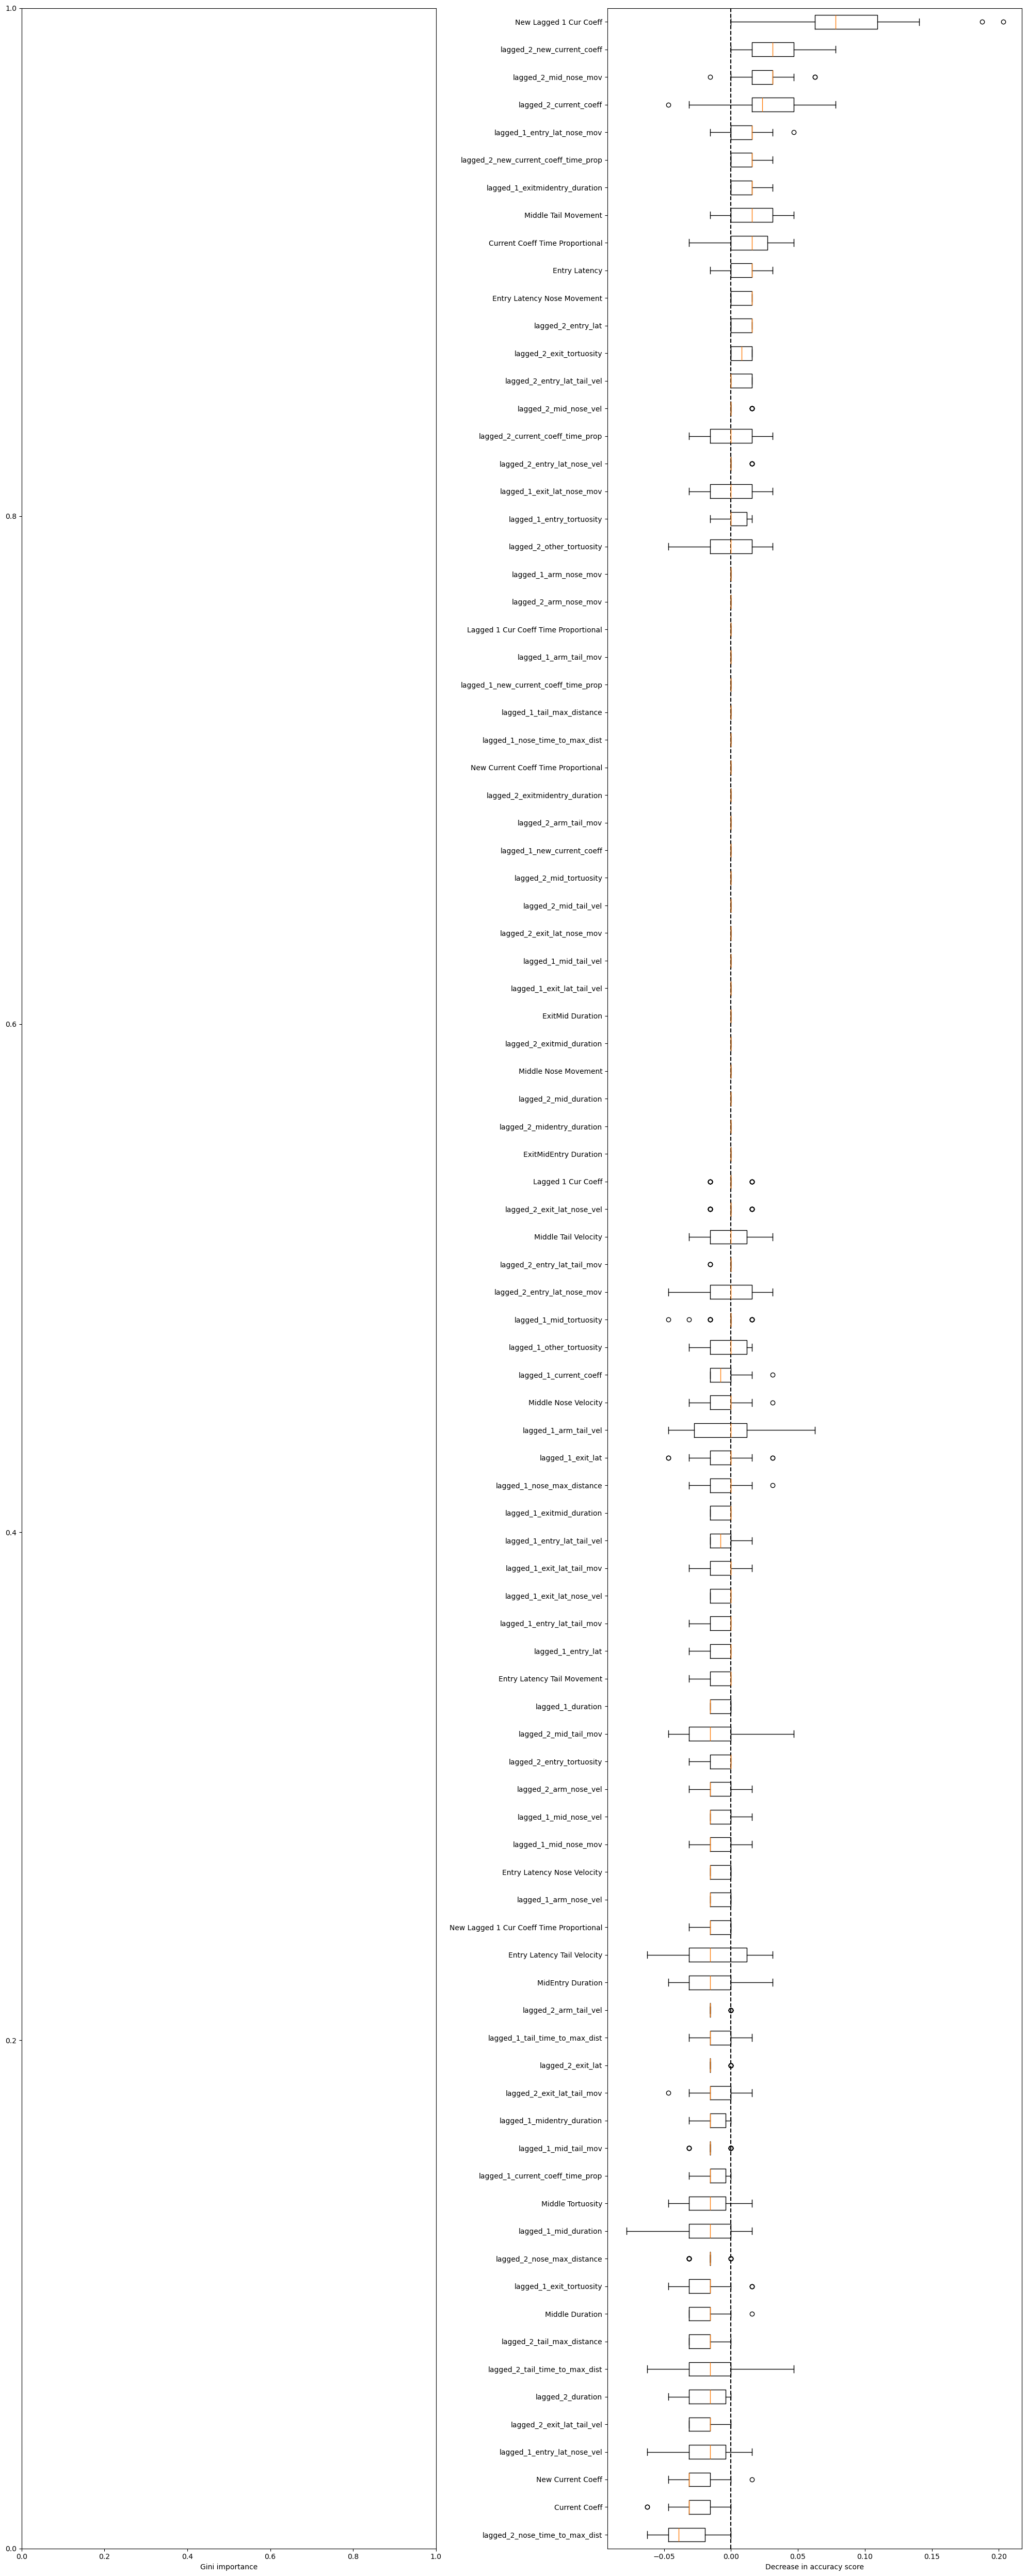

In [294]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_lh, X_test_lh, y_test_lh, x_lowhigh,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# first option (57 vs 111 vs 151)

In [298]:
grouped_lagged_added_stats_ri_low2 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2)]

In [299]:
grouped_lagged_added_stats_ri_low2

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
5           0.255814               0.139535               0.139535   
9           0.116279               0.255814               0.279070   
10          0.255814               0.116279               0.255814   
11          0.139535               0.255814               0.116279   
18          0.813953               0.162791               0.116279   
19          0.162791               0.813953               0.162791   
24          0.302326               0.139535               0.325581   
31          0.279070               1.000000               0.000000   
40          0.441860               0.558140               0.465116   
46          0.790698               0.093023               0.302326   
53          0.071429               0.027473               0.164835   
54          0.120879               0.071429               0.027473   
56          0.049451               0.164835               0.120879   
61          0.126374               0.076923               0.000000   
71          0.142857               0.137363               0.093407   
74          0.076923               0.065934               0.324176   
80          0.263889               0.041667               0.277778   
103         0.298507               0.119403               0.208955   
104         0.089552               0.298507               0.119403   
106         0.089552               0.059701               0.089552   
127         0.597015               0.567164               0.223881   
133         0.089109               0.366337               0.405941   
135         0.089109               0.049505               0.089109   
146         0.188119               0.415842               0.138614   
153         0.217822               0.267327               0.108911   
160         0.148515               0.039604               0.336634   
170         0.554455               0.069307               0.227723   
172         0.059406               0.584158               0.554455   
175         0.034783               0.000000               0.000000   
176         0.000000               0.034783               0.000000   
184         0.034783               0.026087               0.460870   
186         0.113043               0.069565               0.034783   
187         0.226087               0.113043               0.069565   
188         0.356522               0.226087               0.113043   
192         0.269565               0.965217               0.000000   
193         0.165217               0.269565               0.965217   
194         0.730435               0.165217               0.269565   
195         0.200000               0.730435               0.165217   
197         0.043478               0.147826               0.200000   
203         0.182609               0.182609               0.000000   
209         0.356522               0.200000               0.008696   
210         0.208696               0.356522               0.200000   
212         0.191304               1.000000               0.208696   
213         0.078261               0.191304               1.000000   
224         1.000000               0.229885               0.000000   
231         0.206897               0.172414               0.045977   
239         0.206897               0.137931               0.103448   
241         0.264368               0.137931               0.206897   
248         0.033333               0.061111               0.000000   
254         0.477778               0.088889               0.161111   
265         0.034314               0.053922               0.049020   
279         0.294118               0.029412               0.078431   
280         0.235294               0.294118               0.029412   
281         0.279412               0.235294               0.294118   
292         0.411765               0.088235               0.186275   
296         0.117925               0.089623               0.000000   
320         0.7

In [300]:
grouped_lagged_added_stats_ri_low2['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\171888648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_low2['Binary'] = 0


In [239]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [301]:
grouped_lagged_added_stats_ri_mid3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==3)]

In [302]:
grouped_lagged_added_stats_ri_mid3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
6           0.488372               0.255814               0.139535   
..               ...                    ...                    ...   
297         0.485849               0.117925               0.089623   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
6                 0.139535               0.279070              0.516920   
..                     ...                    ...                   ...   
297               0.000000               0.136792              0.296705   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
6                 0.470011               0.212414               0.226293   
..                     ...                    ...                    ...   
297               0.183453               0.113333               0.011136   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
6                 0.239721  ...                      2.694444   
..                     ...  ...                           ...   
297               0.165845  ...                      1.122186   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
6                             0.555556                           0.587963   
..                                 ...                                ...   
297                           

In [303]:
grouped_lagged_added_stats_ri_mid3['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\3260617146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_mid3['Binary'] = 1


In [304]:
grouped_lagged_added_stats_ri_high45 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3)]

In [305]:
grouped_lagged_added_stats_ri_high45

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
8           0.255814               0.279070               0.488372   
13          0.511628               0.139535               0.139535   
15          0.162791               0.093023               0.511628   
17          0.162791               0.116279               0.162791   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
8                 0.255814               0.139535              0.460563   
13                0.255814               0.116279              0.493775   
15                0.139535               0.139535              0.341940   
17                0.093023               0.511628              0.311462   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
8                 0.431110               0.516920               0.470011   
13                0.261105               0.320118               0.378745   
15                0.111559               0.493775               0.261105   
17                0.275235               0.341940               0.111559   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
8                 0.212414  ...                      2.569444   
13                0.263726  ...                      2.027778   
15                0.320118  ...                      2.486111   
17                0.493775  ...                      2.472222   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
8                             0.402778                           0.458333   
13                            0.506944                           0.449074   
15                            0.569444                           0.592593   
17                            0.347222                           0.393519   
..                                 ...                                ...   
315                           

In [306]:
grouped_lagged_added_stats_ri_high45['Binary'] = 2

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\2876762626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_high45['Binary'] = 2


In [307]:
grouped_lagged_first= pd.concat([grouped_lagged_added_stats_ri_low2,grouped_lagged_added_stats_ri_mid3, grouped_lagged_added_stats_ri_high45])

In [308]:
grouped_lagged_first_ri = grouped_lagged_first.reset_index(drop=True)

In [309]:
x_first = grouped_lagged_first_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [417]:
x_first.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [473]:
x_f = x_first.values

In [474]:
y_f = grouped_lagged_first_ri['Binary'].values

In [475]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, test_size=0.2, random_state=96)

In [476]:
mod_f =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=5, random_state=44)
mod_f.fit(X_train_f, y_train_f)
y_pred_f=mod_f.predict(X_test_f)

In [477]:
mod_f.n_iter_

100

In [478]:
target_names = ['0', '1', '2']

In [479]:
f1_sc_f = f1_score(y_test_f, y_pred_f, average = 'weighted')
f1_sc_f

0.5711019163763066

In [480]:
p_sc_f = precision_score(y_test_f, y_pred_f, average = 'weighted')
p_sc_f

0.6279447115384615

In [481]:
cf_matrix_f = confusion_matrix(y_test_f, y_pred_f)
cf_matrix_f

array([[ 6,  5,  2],
       [ 2,  7,  6],
       [ 0, 14, 22]], dtype=int64)

In [482]:
print(classification_report(y_test_f, y_pred_f, target_names=target_names))

              precision    recall  f1-score   support

           0       0.75      0.46      0.57        13
           1       0.27      0.47      0.34        15
           2       0.73      0.61      0.67        36

    accuracy                           0.55        64
   macro avg       0.58      0.51      0.53        64
weighted avg       0.63      0.55      0.57        64



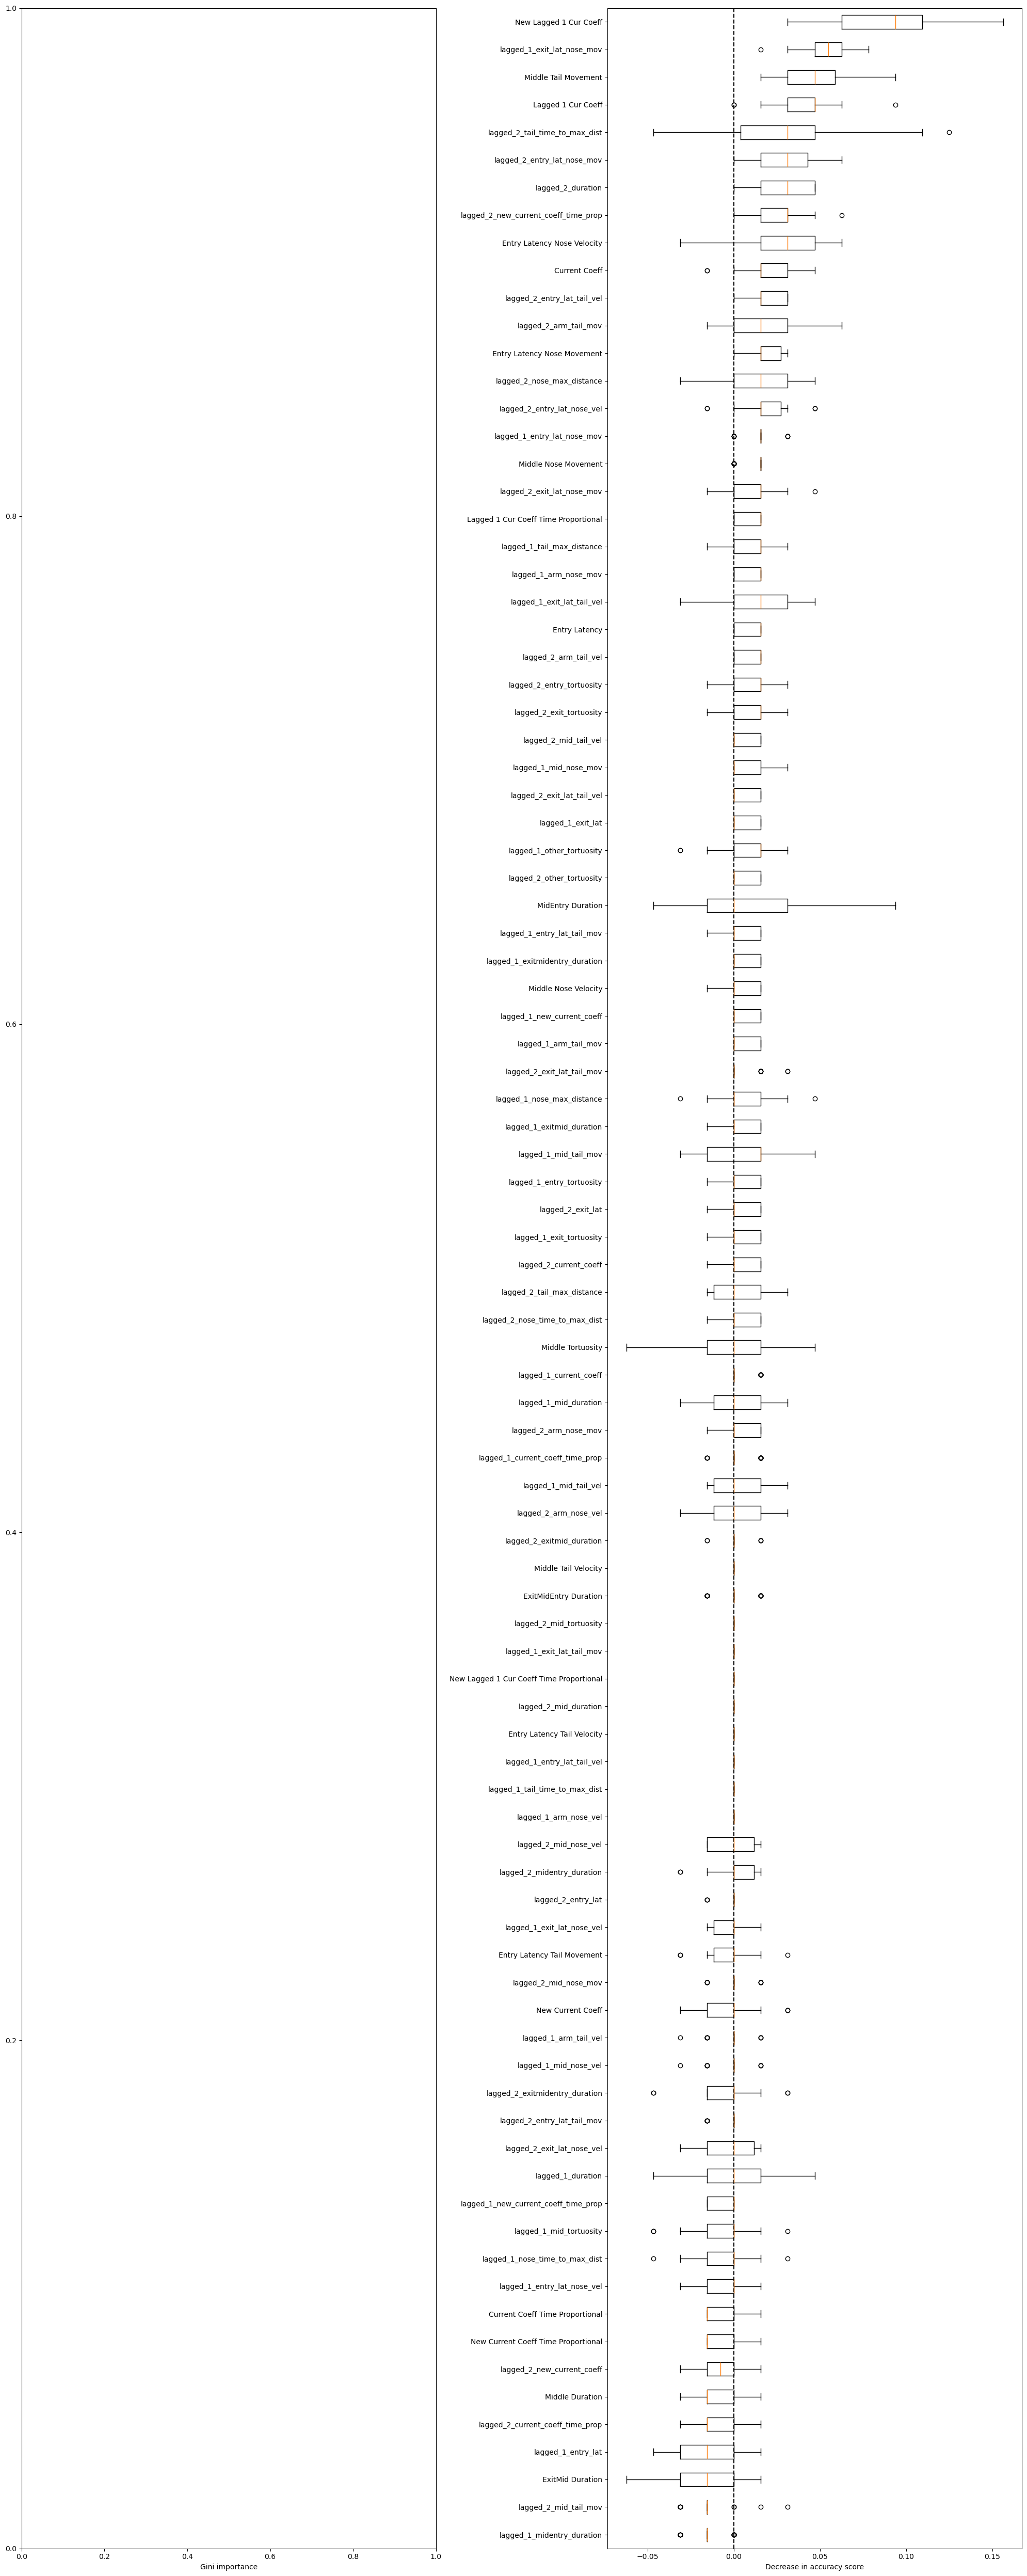

In [483]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_f, X_test_f, y_test_f, x_first,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# second option (57 vs 70 vs 192)

In [503]:
grouped_lagged_added_stats_ri_fail2 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2)]

In [504]:
grouped_lagged_added_stats_ri_fail2

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
5           0.255814               0.139535               0.139535   
9           0.116279               0.255814               0.279070   
10          0.255814               0.116279               0.255814   
11          0.139535               0.255814               0.116279   
18          0.813953               0.162791               0.116279   
19          0.162791               0.813953               0.162791   
24          0.302326               0.139535               0.325581   
31          0.279070               1.000000               0.000000   
40          0.441860               0.558140               0.465116   
46          0.790698               0.093023               0.302326   
53          0.071429               0.027473               0.164835   
54          0.120879               0.071429               0.027473   
56          0.049451               0.164835               0.120879   
61          0.126374               0.076923               0.000000   
71          0.142857               0.137363               0.093407   
74          0.076923               0.065934               0.324176   
80          0.263889               0.041667               0.277778   
103         0.298507               0.119403               0.208955   
104         0.089552               0.298507               0.119403   
106         0.089552               0.059701               0.089552   
127         0.597015               0.567164               0.223881   
133         0.089109               0.366337               0.405941   
135         0.089109               0.049505               0.089109   
146         0.188119               0.415842               0.138614   
153         0.217822               0.267327               0.108911   
160         0.148515               0.039604               0.336634   
170         0.554455               0.069307               0.227723   
172         0.059406               0.584158               0.554455   
175         0.034783               0.000000               0.000000   
176         0.000000               0.034783               0.000000   
184         0.034783               0.026087               0.460870   
186         0.113043               0.069565               0.034783   
187         0.226087               0.113043               0.069565   
188         0.356522               0.226087               0.113043   
192         0.269565               0.965217               0.000000   
193         0.165217               0.269565               0.965217   
194         0.730435               0.165217               0.269565   
195         0.200000               0.730435               0.165217   
197         0.043478               0.147826               0.200000   
203         0.182609               0.182609               0.000000   
209         0.356522               0.200000               0.008696   
210         0.208696               0.356522               0.200000   
212         0.191304               1.000000               0.208696   
213         0.078261               0.191304               1.000000   
224         1.000000               0.229885               0.000000   
231         0.206897               0.172414               0.045977   
239         0.206897               0.137931               0.103448   
241         0.264368               0.137931               0.206897   
248         0.033333               0.061111               0.000000   
254         0.477778               0.088889               0.161111   
265         0.034314               0.053922               0.049020   
279         0.294118               0.029412               0.078431   
280         0.235294               0.294118               0.029412   
281         0.279412               0.235294               0.294118   
292         0.411765               0.088235               0.186275   
296         0.117925               0.089623               0.000000   
320         0.7

In [505]:
grouped_lagged_added_stats_ri_fail2['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\3953507641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_fail2['Binary'] = 0


In [506]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [507]:
grouped_lagged_added_stats_ri_fail3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==3)&(grouped_lagged_added_stats_ri['lagged_1_choice_ago']>2)]

In [508]:
grouped_lagged_added_stats_ri_fail3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
7           0.279070               0.488372               0.255814   
..               ...                    ...                    ...   
289         0.196078               0.808824               0.039216   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
7                 0.139535               0.139535              0.431110   
..                     ...                    ...                   ...   
289               0.019608               0.004902              0.149776   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
7                 0.516920               0.470011               0.212414   
..                     ...                    ...                    ...   
289               0.938731               0.084809               0.066958   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
7                 0.226293  ...                      2.611111   
..                     ...  ...                           ...   
289               0.032894  ...                      1.266476   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
7                             0.493056                           0.509259   
..                                 ...                                ...   
289                           

In [509]:
grouped_lagged_added_stats_ri_fail3['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\2867877029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_fail3['Binary'] = 1


In [510]:
grouped_lagged_added_stats_ri_notfail = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3)|((grouped_lagged_added_stats_ri['Choice Output']==3)&(grouped_lagged_added_stats_ri['lagged_1_choice_ago']==2))]

In [511]:
grouped_lagged_added_stats_ri_notfail

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
6           0.488372               0.255814               0.139535   
8           0.255814               0.279070               0.488372   
12          0.139535               0.139535               0.255814   
13          0.511628               0.139535               0.139535   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
6                 0.139535               0.279070              0.516920   
8                 0.255814               0.139535              0.460563   
12                0.116279               0.255814              0.261105   
13                0.255814               0.116279              0.493775   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
6                 0.470011               0.212414               0.226293   
8                 0.431110               0.516920               0.470011   
12                0.320118               0.378745               0.263726   
13                0.261105               0.320118               0.378745   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
6                 0.239721  ...                      2.694444   
8                 0.212414  ...                      2.569444   
12                0.460563  ...                      1.777778   
13                0.263726  ...                      2.027778   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
6                             0.555556                           0.587963   
8                             0.402778                           0.458333   
12                            0.354167                           0.356481   
13                            0.506944                           0.449074   
..                                 ...                                ...   
315                           

In [512]:
grouped_lagged_added_stats_ri_notfail['Binary'] = 2

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\3378188457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_notfail['Binary'] = 2


In [513]:
grouped_lagged_second= pd.concat([grouped_lagged_added_stats_ri_fail2,grouped_lagged_added_stats_ri_fail3, grouped_lagged_added_stats_ri_notfail])

In [514]:
grouped_lagged_second_ri = grouped_lagged_second.reset_index(drop=True)

In [515]:
grouped_lagged_second_ri

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.255814               0.139535               0.139535   
1           0.116279               0.255814               0.279070   
2           0.255814               0.116279               0.255814   
3           0.139535               0.255814               0.116279   
4           0.813953               0.162791               0.116279   
..               ...                    ...                    ...   
314         0.070755               0.028302               0.023585   
315         0.009434               0.070755               0.028302   
316         0.004717               0.009434               0.070755   
317         0.150943               0.004717               0.009434   
318         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.279070               0.302326              0.470011   
1                 0.488372               0.255814              0.263726   
2                 0.279070               0.488372              0.378745   
3                 0.255814               0.279070              0.320118   
4                 0.162791               0.093023              0.712284   
..                     ...                    ...                   ...   
314               0.891509               0.103774              0.135402   
315               0.023585               0.891509              0.029302   
316               0.028302               0.023585              0.016390   
317               0.070755               0.028302              0.224511   
318               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.212414               0.226293               0.239721   
1                 0.460563               0.431110               0.516920   
2                 0.263726               0.460563               0.431110   
3                 0.378745               0.263726               0.460563   
4                 0.311462               0.275235               0.341940   
..                     ...                    ...                    ...   
314               0.059617               0.074648               1.000000   
315               0.135402               0.059617               0.074648   
316               0.029302               0.135402               0.059617   
317               0.016390               0.029302               0.135402   
318               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  mean_2_past_exitmidentry_duration  \
0                 0.291543  ...                           0.597222   
1                 0.470011  ...                           0.354167   
2                 0.516920  ...                           0.340278   
3                 0.431110  ...                           0.347222   
4                 0.111559  ...                           0.666667   
..                     ...  ...                                ...   
314               0.161598  ...                           0.112540   
315               1.000000  ...                           0.114148   
316               0.074648  ...                           0.120579   
317               0.059617  ...                           0.217042   
318               0.135402  ...                           0.366559   

     mean_3_past_exitmidentry_duration  mean_4_past_exitmidentry_duration  \
0                             0.541667                           0.531250   
1                             0.375000                           0.423611   
2                             0.356481                           0.371528   
3                             0.337963                           0.350694   
4                             0.564815                           0.545139   
..                                 ...         

In [516]:
x_second = grouped_lagged_second_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [517]:
x_second.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [544]:
x_s = x_second.values

In [624]:
x_s

array([[0.25581395, 0.13953488, 0.13953488, ..., 0.54166667, 0.65277778,
        0.43055556],
       [0.11627907, 0.25581395, 0.27906977, ..., 0.31944444, 0.38888889,
        0.41666667],
       [0.25581395, 0.11627907, 0.25581395, ..., 0.36111111, 0.31944444,
        0.38888889],
       ...,
       [0.00471698, 0.00943396, 0.07075472, ..., 0.1414791 , 0.09967846,
        0.12861736],
       [0.1509434 , 0.00471698, 0.00943396, ..., 0.2926045 , 0.1414791 ,
        0.09967846],
       [0.21698113, 0.1509434 , 0.00471698, ..., 0.44051447, 0.2926045 ,
        0.1414791 ]])

In [625]:
y_s = grouped_lagged_second_ri['Binary'].values

In [649]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(x_s, y_s, test_size=0.2, random_state=3)

In [650]:
mod_s =  HistGradientBoostingClassifier(learning_rate = 0.5, validation_fraction=0.1, n_iter_no_change=10, random_state=59)
mod_s.fit(X_train_s, y_train_s)
y_pred_s=mod_s.predict(X_test_s)

In [651]:
mod_s.n_iter_

100

In [652]:
target_names = ['0', '1', '2']

In [653]:
f1_sc_s = f1_score(y_test_s, y_pred_s, average = 'weighted')
f1_sc_s

0.5475812693498452

In [654]:
p_sc_s = precision_score(y_test_s, y_pred_s, average = 'weighted')
p_sc_s

0.5341796875

In [655]:
cf_matrix_s = confusion_matrix(y_test_s, y_pred_s)
cf_matrix_s

array([[ 2,  3,  6],
       [ 4,  3,  9],
       [ 2,  2, 33]], dtype=int64)

In [656]:
print(classification_report(y_test_s, y_pred_s, target_names=target_names))

              precision    recall  f1-score   support

           0       0.25      0.18      0.21        11
           1       0.38      0.19      0.25        16
           2       0.69      0.89      0.78        37

    accuracy                           0.59        64
   macro avg       0.44      0.42      0.41        64
weighted avg       0.53      0.59      0.55        64



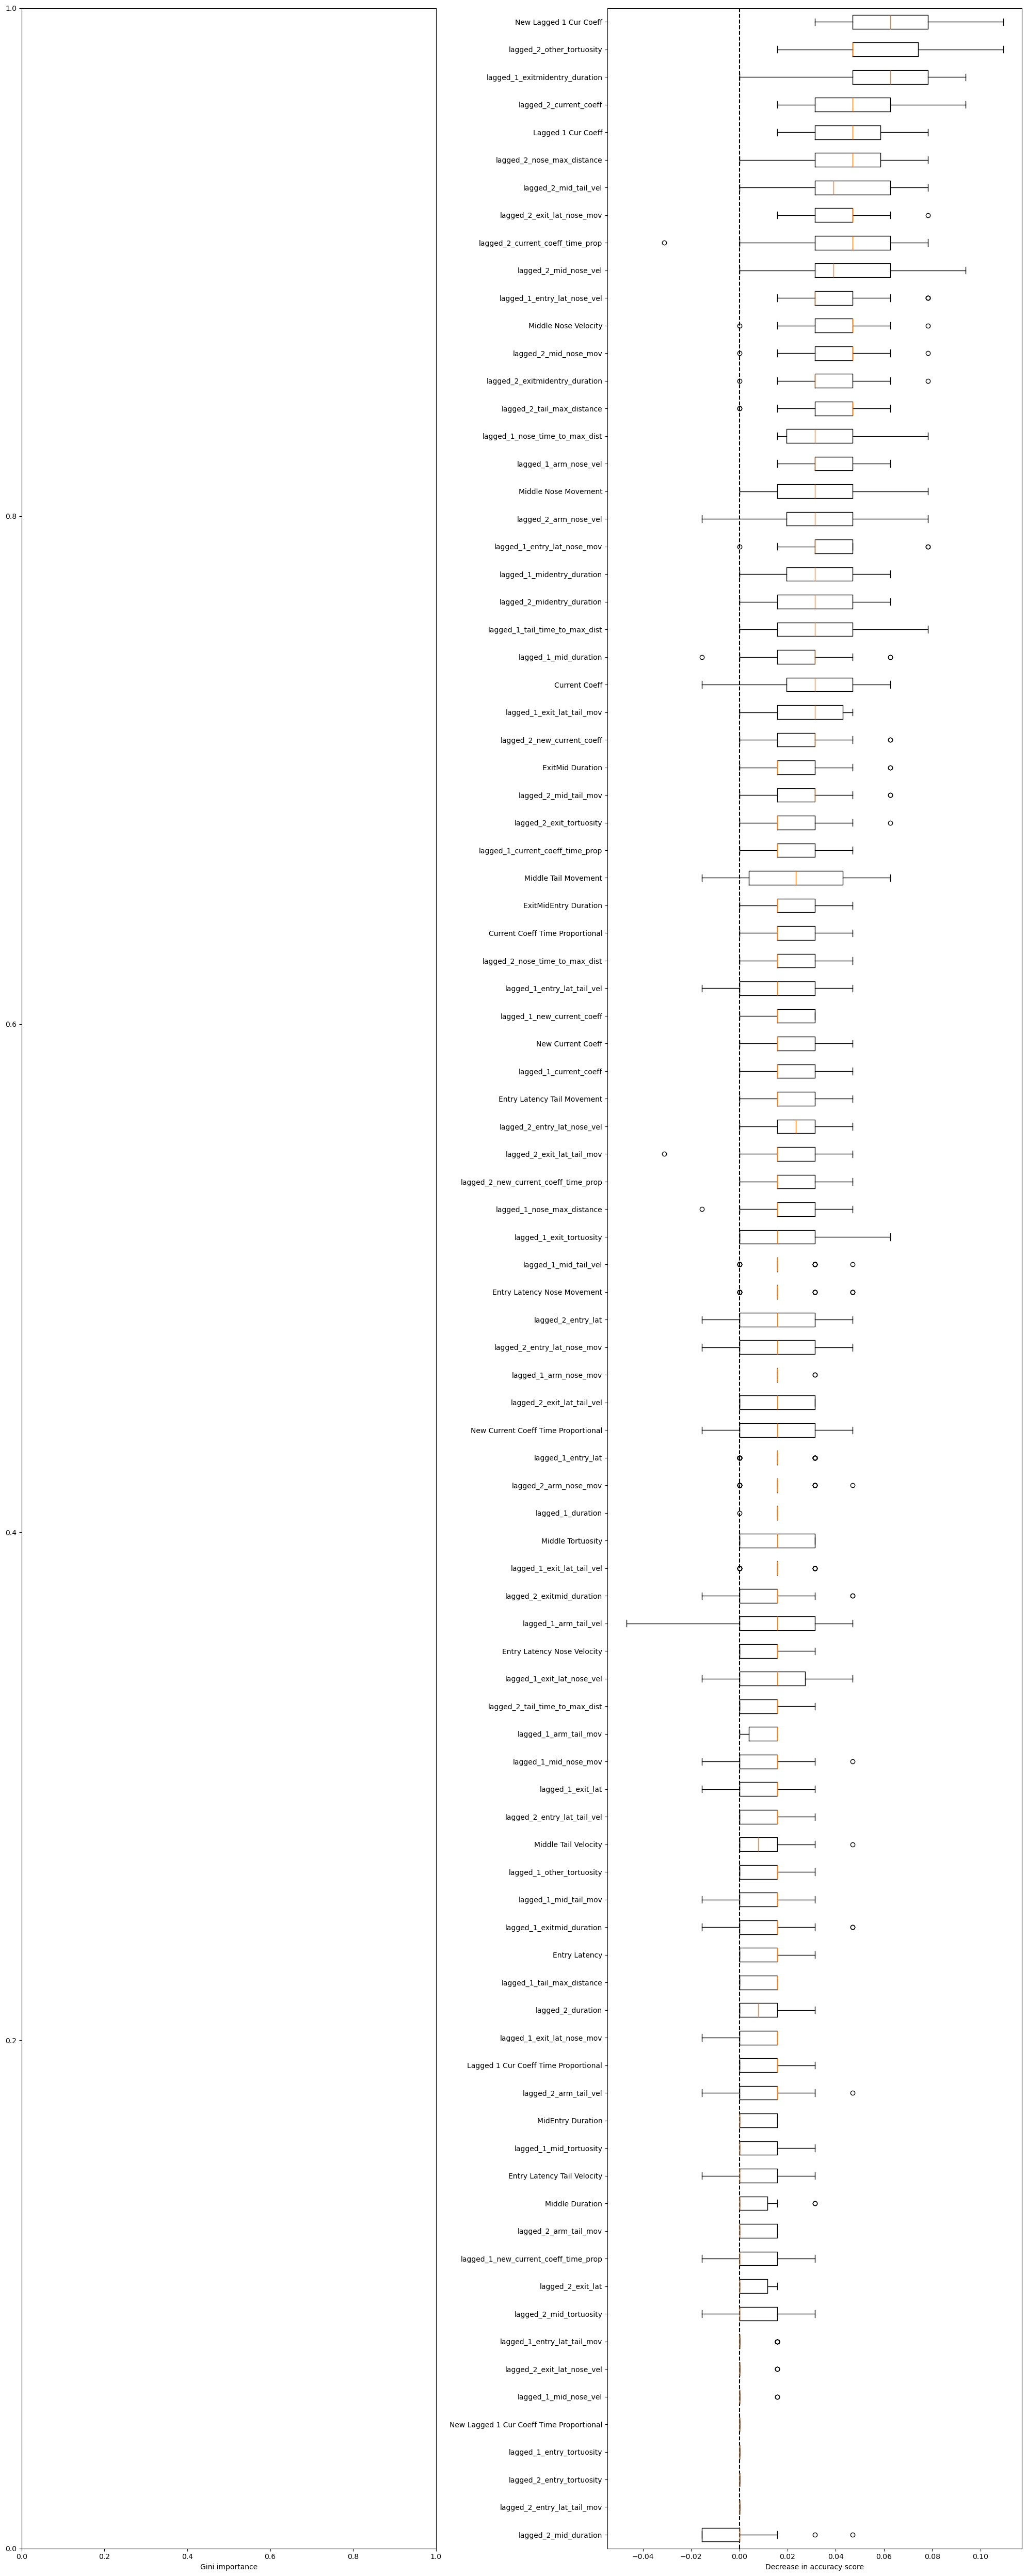

In [657]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_s, X_test_s, y_test_s, x_second,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# first option (57 vs 111 vs 151) (including lag3 as well)

In [658]:
grouped_lagged_added_stats_ri_low2_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2)]

In [659]:
grouped_lagged_added_stats_ri_low2_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
5           0.255814               0.139535               0.139535   
9           0.116279               0.255814               0.279070   
10          0.255814               0.116279               0.255814   
11          0.139535               0.255814               0.116279   
18          0.813953               0.162791               0.116279   
19          0.162791               0.813953               0.162791   
24          0.302326               0.139535               0.325581   
31          0.279070               1.000000               0.000000   
40          0.441860               0.558140               0.465116   
46          0.790698               0.093023               0.302326   
53          0.071429               0.027473               0.164835   
54          0.120879               0.071429               0.027473   
56          0.049451               0.164835               0.120879   
61          0.126374               0.076923               0.000000   
71          0.142857               0.137363               0.093407   
74          0.076923               0.065934               0.324176   
80          0.263889               0.041667               0.277778   
103         0.298507               0.119403               0.208955   
104         0.089552               0.298507               0.119403   
106         0.089552               0.059701               0.089552   
127         0.597015               0.567164               0.223881   
133         0.089109               0.366337               0.405941   
135         0.089109               0.049505               0.089109   
146         0.188119               0.415842               0.138614   
153         0.217822               0.267327               0.108911   
160         0.148515               0.039604               0.336634   
170         0.554455               0.069307               0.227723   
172         0.059406               0.584158               0.554455   
175         0.034783               0.000000               0.000000   
176         0.000000               0.034783               0.000000   
184         0.034783               0.026087               0.460870   
186         0.113043               0.069565               0.034783   
187         0.226087               0.113043               0.069565   
188         0.356522               0.226087               0.113043   
192         0.269565               0.965217               0.000000   
193         0.165217               0.269565               0.965217   
194         0.730435               0.165217               0.269565   
195         0.200000               0.730435               0.165217   
197         0.043478               0.147826               0.200000   
203         0.182609               0.182609               0.000000   
209         0.356522               0.200000               0.008696   
210         0.208696               0.356522               0.200000   
212         0.191304               1.000000               0.208696   
213         0.078261               0.191304               1.000000   
224         1.000000               0.229885               0.000000   
231         0.206897               0.172414               0.045977   
239         0.206897               0.137931               0.103448   
241         0.264368               0.137931               0.206897   
248         0.033333               0.061111               0.000000   
254         0.477778               0.088889               0.161111   
265         0.034314               0.053922               0.049020   
279         0.294118               0.029412               0.078431   
280         0.235294               0.294118               0.029412   
281         0.279412               0.235294               0.294118   
292         0.411765               0.088235               0.186275   
296         0.117925               0.089623               0.000000   
320         0.7

In [660]:
grouped_lagged_added_stats_ri_low2_lag3['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\408901300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_low2_lag3['Binary'] = 0


In [239]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [661]:
grouped_lagged_added_stats_ri_mid3_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==3)]

In [662]:
grouped_lagged_added_stats_ri_mid3_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
6           0.488372               0.255814               0.139535   
..               ...                    ...                    ...   
297         0.485849               0.117925               0.089623   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
6                 0.139535               0.279070              0.516920   
..                     ...                    ...                   ...   
297               0.000000               0.136792              0.296705   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
6                 0.470011               0.212414               0.226293   
..                     ...                    ...                    ...   
297               0.183453               0.113333               0.011136   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
6                 0.239721  ...                      2.694444   
..                     ...  ...                           ...   
297               0.165845  ...                      1.122186   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
6                             0.555556                           0.587963   
..                                 ...                                ...   
297                           

In [663]:
grouped_lagged_added_stats_ri_mid3_lag3['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\680005771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_mid3_lag3['Binary'] = 1


In [664]:
grouped_lagged_added_stats_ri_high45_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3)]

In [665]:
grouped_lagged_added_stats_ri_high45_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
8           0.255814               0.279070               0.488372   
13          0.511628               0.139535               0.139535   
15          0.162791               0.093023               0.511628   
17          0.162791               0.116279               0.162791   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
8                 0.255814               0.139535              0.460563   
13                0.255814               0.116279              0.493775   
15                0.139535               0.139535              0.341940   
17                0.093023               0.511628              0.311462   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
8                 0.431110               0.516920               0.470011   
13                0.261105               0.320118               0.378745   
15                0.111559               0.493775               0.261105   
17                0.275235               0.341940               0.111559   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
8                 0.212414  ...                      2.569444   
13                0.263726  ...                      2.027778   
15                0.320118  ...                      2.486111   
17                0.493775  ...                      2.472222   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
8                             0.402778                           0.458333   
13                            0.506944                           0.449074   
15                            0.569444                           0.592593   
17                            0.347222                           0.393519   
..                                 ...                                ...   
315                           

In [666]:
grouped_lagged_added_stats_ri_high45_lag3['Binary'] = 2

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\4238725983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_high45_lag3['Binary'] = 2


In [667]:
grouped_lagged_first_lag3= pd.concat([grouped_lagged_added_stats_ri_low2_lag3,grouped_lagged_added_stats_ri_mid3_lag3, grouped_lagged_added_stats_ri_high45_lag3])

In [669]:
grouped_lagged_first_lag3_ri = grouped_lagged_first_lag3.reset_index(drop=True)

In [671]:
x_first_lag3 = grouped_lagged_first_lag3_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
                                                            
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
                                                            
         'lagged_4_mid_duration', 
       'lagged_4_mid_nose_mov',  'lagged_4_mid_nose_vel',
       'lagged_4_mid_tail_mov',  'lagged_4_mid_tail_vel',  'lagged_4_mid_tortuosity',                                              
         'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff',  
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional', 
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
     
       'lagged_4_entry_lat',  'lagged_4_entry_lat_nose_mov', 
       'lagged_4_entry_lat_nose_vel',  'lagged_4_entry_lat_tail_mov',
       'lagged_4_entry_lat_tail_vel',  'lagged_4_duration', 
       'lagged_4_nose_max_distance',  'lagged_4_nose_time_to_max_dist', 
       'lagged_4_tail_max_distance',  'lagged_4_tail_time_to_max_dist',                                         
        'lagged_4_arm_nose_mov',  'lagged_4_arm_nose_vel',                                                 
        'lagged_4_arm_tail_mov',  'lagged_4_arm_tail_vel',
       'lagged_4_entry_tortuosity', 'lagged_4_exit_tortuosity', 
       'lagged_4_other_tortuosity',  'lagged_4_exit_lat', 
       'lagged_4_exit_lat_nose_mov',  'lagged_4_exit_lat_nose_vel', 
       'lagged_4_exit_lat_tail_mov',  'lagged_4_exit_lat_tail_vel',
       'lagged_4_exitmid_duration', 'lagged_4_midentry_duration', 
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [672]:
x_first_lag3.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'Middle Nose Movement',
       'lagged_1_mid_nose_mov', 'lagged_2_mid_nose_mov',
       'lagged_3_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel',
       ...
       'lagged_2_exitmid_duration', 'lagged_3_exitmid_duration',
       'MidEntry Duration', 'lagged_1_midentry_duration',
       'lagged_2_midentry_duration', 'lagged_3_midentry_duration',
       'ExitMidEntry Duration', 'lagged_1_exitmidentry_duration',
       'lagged_2_exitmidentry_duration', 'lagged_3_exitmidentry_duration'],
      dtype='object', length=127)

In [673]:
x_f_lag3 = x_first_lag3.values

In [674]:
y_f_lag3 = grouped_lagged_first_lag3_ri['Binary'].values

In [692]:
X_train_f_lag3, X_test_f_lag3, y_train_f_lag3, y_test_f_lag3 = train_test_split(x_f_lag3, y_f_lag3, test_size=0.2, random_state=95)

In [693]:
mod_f_lag3 =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=5, random_state=44)
mod_f_lag3.fit(X_train_f_lag3, y_train_f_lag3)
y_pred_f_lag3=mod_f_lag3.predict(X_test_f_lag3)

In [694]:
mod_f_lag3.n_iter_

100

In [695]:
target_names = ['0', '1', '2']

In [696]:
f1_sc_f_lag3 = f1_score(y_test_f_lag3, y_pred_f_lag3, average = 'weighted')
f1_sc_f_lag3

0.6014593698175787

In [697]:
p_sc_f_lag3 = precision_score(y_test_f_lag3, y_pred_f_lag3, average = 'weighted')
p_sc_f_lag3

0.6018270944741533

In [698]:
cf_matrix_f_lag3 = confusion_matrix(y_test_f_lag3, y_pred_f_lag3)
cf_matrix_f_lag3

array([[ 7,  4,  3],
       [ 2,  8,  9],
       [ 2,  5, 24]], dtype=int64)

In [699]:
print(classification_report(y_test_f_lag3, y_pred_f_lag3, target_names=target_names))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.47      0.42      0.44        19
           2       0.67      0.77      0.72        31

    accuracy                           0.61        64
   macro avg       0.59      0.57      0.57        64
weighted avg       0.60      0.61      0.60        64



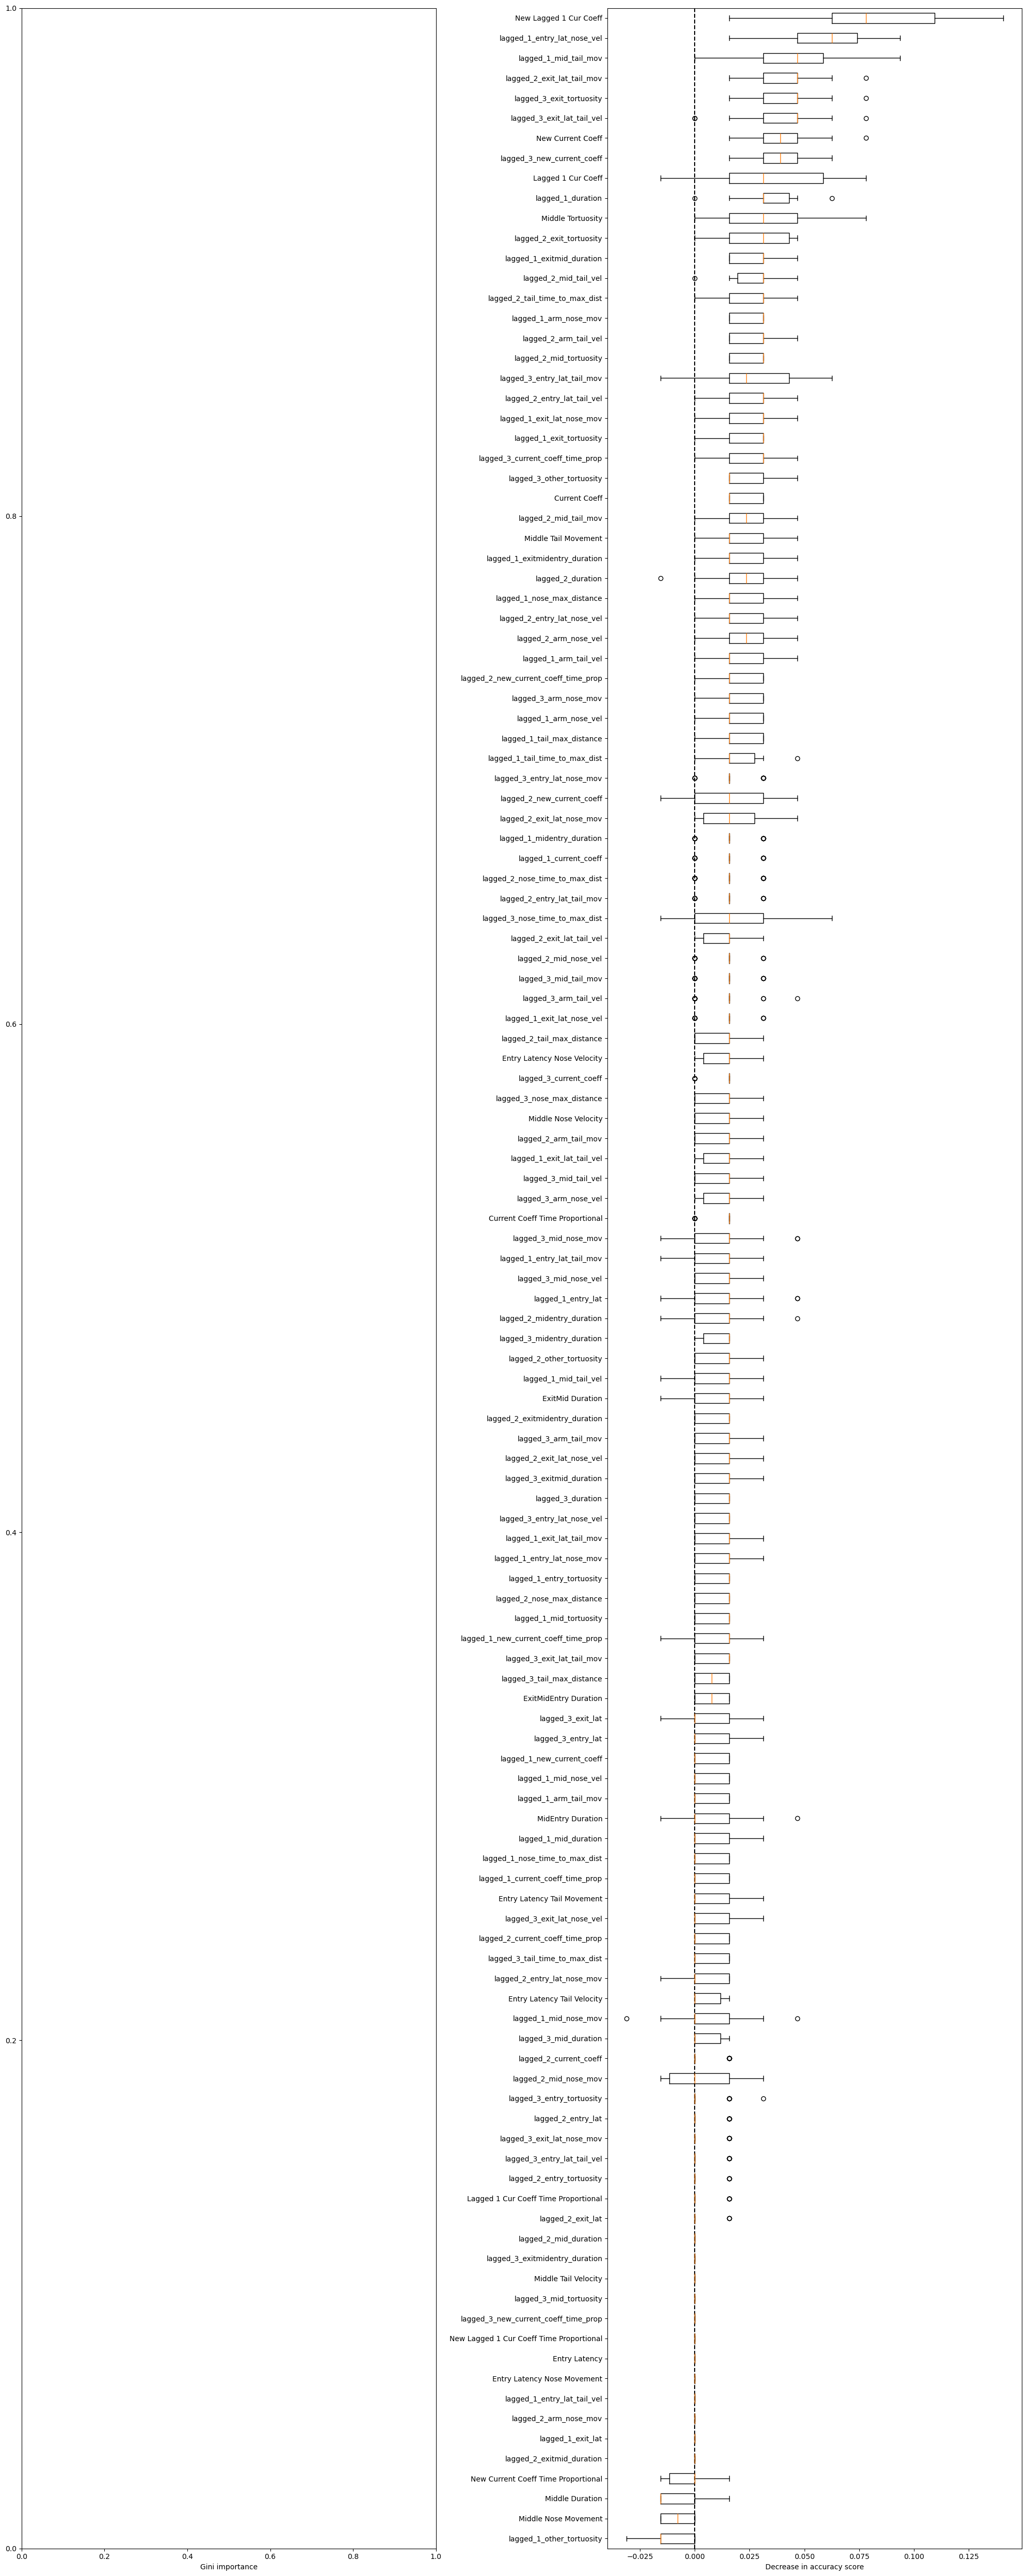

In [700]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_f_lag3, X_test_f_lag3, y_test_f_lag3, x_first_lag3,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# second option (57 vs 70 vs 192) including lag3

In [701]:
grouped_lagged_added_stats_ri_fail2_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2)]

In [702]:
grouped_lagged_added_stats_ri_fail2_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
5           0.255814               0.139535               0.139535   
9           0.116279               0.255814               0.279070   
10          0.255814               0.116279               0.255814   
11          0.139535               0.255814               0.116279   
18          0.813953               0.162791               0.116279   
19          0.162791               0.813953               0.162791   
24          0.302326               0.139535               0.325581   
31          0.279070               1.000000               0.000000   
40          0.441860               0.558140               0.465116   
46          0.790698               0.093023               0.302326   
53          0.071429               0.027473               0.164835   
54          0.120879               0.071429               0.027473   
56          0.049451               0.164835               0.120879   
61          0.126374               0.076923               0.000000   
71          0.142857               0.137363               0.093407   
74          0.076923               0.065934               0.324176   
80          0.263889               0.041667               0.277778   
103         0.298507               0.119403               0.208955   
104         0.089552               0.298507               0.119403   
106         0.089552               0.059701               0.089552   
127         0.597015               0.567164               0.223881   
133         0.089109               0.366337               0.405941   
135         0.089109               0.049505               0.089109   
146         0.188119               0.415842               0.138614   
153         0.217822               0.267327               0.108911   
160         0.148515               0.039604               0.336634   
170         0.554455               0.069307               0.227723   
172         0.059406               0.584158               0.554455   
175         0.034783               0.000000               0.000000   
176         0.000000               0.034783               0.000000   
184         0.034783               0.026087               0.460870   
186         0.113043               0.069565               0.034783   
187         0.226087               0.113043               0.069565   
188         0.356522               0.226087               0.113043   
192         0.269565               0.965217               0.000000   
193         0.165217               0.269565               0.965217   
194         0.730435               0.165217               0.269565   
195         0.200000               0.730435               0.165217   
197         0.043478               0.147826               0.200000   
203         0.182609               0.182609               0.000000   
209         0.356522               0.200000               0.008696   
210         0.208696               0.356522               0.200000   
212         0.191304               1.000000               0.208696   
213         0.078261               0.191304               1.000000   
224         1.000000               0.229885               0.000000   
231         0.206897               0.172414               0.045977   
239         0.206897               0.137931               0.103448   
241         0.264368               0.137931               0.206897   
248         0.033333               0.061111               0.000000   
254         0.477778               0.088889               0.161111   
265         0.034314               0.053922               0.049020   
279         0.294118               0.029412               0.078431   
280         0.235294               0.294118               0.029412   
281         0.279412               0.235294               0.294118   
292         0.411765               0.088235               0.186275   
296         0.117925               0.089623               0.000000   
320         0.7

In [703]:
grouped_lagged_added_stats_ri_fail2_lag3['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\1351062443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_fail2_lag3['Binary'] = 0


In [506]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [704]:
grouped_lagged_added_stats_ri_fail3_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==3)&(grouped_lagged_added_stats_ri['lagged_1_choice_ago']>2)]

In [705]:
grouped_lagged_added_stats_ri_fail3_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
7           0.279070               0.488372               0.255814   
..               ...                    ...                    ...   
289         0.196078               0.808824               0.039216   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
7                 0.139535               0.139535              0.431110   
..                     ...                    ...                   ...   
289               0.019608               0.004902              0.149776   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
7                 0.516920               0.470011               0.212414   
..                     ...                    ...                    ...   
289               0.938731               0.084809               0.066958   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
7                 0.226293  ...                      2.611111   
..                     ...  ...                           ...   
289               0.032894  ...                      1.266476   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
7                             0.493056                           0.509259   
..                                 ...                                ...   
289                           

In [706]:
grouped_lagged_added_stats_ri_fail3_lag3['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\3011521447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_fail3_lag3['Binary'] = 1


In [707]:
grouped_lagged_added_stats_ri_notfail_lag3 = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3)|((grouped_lagged_added_stats_ri['Choice Output']==3)&(grouped_lagged_added_stats_ri['lagged_1_choice_ago']==2))]

In [708]:
grouped_lagged_added_stats_ri_notfail_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
6           0.488372               0.255814               0.139535   
8           0.255814               0.279070               0.488372   
12          0.139535               0.139535               0.255814   
13          0.511628               0.139535               0.139535   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
6                 0.139535               0.279070              0.516920   
8                 0.255814               0.139535              0.460563   
12                0.116279               0.255814              0.261105   
13                0.255814               0.116279              0.493775   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
6                 0.470011               0.212414               0.226293   
8                 0.431110               0.516920               0.470011   
12                0.320118               0.378745               0.263726   
13                0.261105               0.320118               0.378745   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
6                 0.239721  ...                      2.694444   
8                 0.212414  ...                      2.569444   
12                0.460563  ...                      1.777778   
13                0.263726  ...                      2.027778   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
6                             0.555556                           0.587963   
8                             0.402778                           0.458333   
12                            0.354167                           0.356481   
13                            0.506944                           0.449074   
..                                 ...                                ...   
315                           

In [709]:
grouped_lagged_added_stats_ri_notfail_lag3['Binary'] = 2

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_54492\2613906230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_notfail_lag3['Binary'] = 2


In [710]:
grouped_lagged_second_lag3= pd.concat([grouped_lagged_added_stats_ri_fail2_lag3,grouped_lagged_added_stats_ri_fail3_lag3, grouped_lagged_added_stats_ri_notfail_lag3])

In [711]:
grouped_lagged_second_lag3_ri = grouped_lagged_second_lag3.reset_index(drop=True)

In [712]:
grouped_lagged_second_lag3_ri

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.255814               0.139535               0.139535   
1           0.116279               0.255814               0.279070   
2           0.255814               0.116279               0.255814   
3           0.139535               0.255814               0.116279   
4           0.813953               0.162791               0.116279   
..               ...                    ...                    ...   
314         0.070755               0.028302               0.023585   
315         0.009434               0.070755               0.028302   
316         0.004717               0.009434               0.070755   
317         0.150943               0.004717               0.009434   
318         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.279070               0.302326              0.470011   
1                 0.488372               0.255814              0.263726   
2                 0.279070               0.488372              0.378745   
3                 0.255814               0.279070              0.320118   
4                 0.162791               0.093023              0.712284   
..                     ...                    ...                   ...   
314               0.891509               0.103774              0.135402   
315               0.023585               0.891509              0.029302   
316               0.028302               0.023585              0.016390   
317               0.070755               0.028302              0.224511   
318               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.212414               0.226293               0.239721   
1                 0.460563               0.431110               0.516920   
2                 0.263726               0.460563               0.431110   
3                 0.378745               0.263726               0.460563   
4                 0.311462               0.275235               0.341940   
..                     ...                    ...                    ...   
314               0.059617               0.074648               1.000000   
315               0.135402               0.059617               0.074648   
316               0.029302               0.135402               0.059617   
317               0.016390               0.029302               0.135402   
318               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  mean_2_past_exitmidentry_duration  \
0                 0.291543  ...                           0.597222   
1                 0.470011  ...                           0.354167   
2                 0.516920  ...                           0.340278   
3                 0.431110  ...                           0.347222   
4                 0.111559  ...                           0.666667   
..                     ...  ...                                ...   
314               0.161598  ...                           0.112540   
315               1.000000  ...                           0.114148   
316               0.074648  ...                           0.120579   
317               0.059617  ...                           0.217042   
318               0.135402  ...                           0.366559   

     mean_3_past_exitmidentry_duration  mean_4_past_exitmidentry_duration  \
0                             0.541667                           0.531250   
1                             0.375000                           0.423611   
2                             0.356481                           0.371528   
3                             0.337963                           0.350694   
4                             0.564815                           0.545139   
..                                 ...         

In [713]:
x_second_lag3 = grouped_lagged_second_lag3_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
                                                            
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
                                                            
         'lagged_4_mid_duration', 
       'lagged_4_mid_nose_mov',  'lagged_4_mid_nose_vel',
       'lagged_4_mid_tail_mov',  'lagged_4_mid_tail_vel',  'lagged_4_mid_tortuosity',                                              
         'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff',  
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional', 
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
     
       'lagged_4_entry_lat',  'lagged_4_entry_lat_nose_mov', 
       'lagged_4_entry_lat_nose_vel',  'lagged_4_entry_lat_tail_mov',
       'lagged_4_entry_lat_tail_vel',  'lagged_4_duration', 
       'lagged_4_nose_max_distance',  'lagged_4_nose_time_to_max_dist', 
       'lagged_4_tail_max_distance',  'lagged_4_tail_time_to_max_dist',                                         
        'lagged_4_arm_nose_mov',  'lagged_4_arm_nose_vel',                                                 
        'lagged_4_arm_tail_mov',  'lagged_4_arm_tail_vel',
       'lagged_4_entry_tortuosity', 'lagged_4_exit_tortuosity', 
       'lagged_4_other_tortuosity',  'lagged_4_exit_lat', 
       'lagged_4_exit_lat_nose_mov',  'lagged_4_exit_lat_nose_vel', 
       'lagged_4_exit_lat_tail_mov',  'lagged_4_exit_lat_tail_vel',
       'lagged_4_exitmid_duration', 'lagged_4_midentry_duration', 
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                              
                                                        
                                                        ])


In [714]:
x_second_lag3.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'Middle Nose Movement',
       'lagged_1_mid_nose_mov', 'lagged_2_mid_nose_mov',
       'lagged_3_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel',
       ...
       'lagged_2_exitmid_duration', 'lagged_3_exitmid_duration',
       'MidEntry Duration', 'lagged_1_midentry_duration',
       'lagged_2_midentry_duration', 'lagged_3_midentry_duration',
       'ExitMidEntry Duration', 'lagged_1_exitmidentry_duration',
       'lagged_2_exitmidentry_duration', 'lagged_3_exitmidentry_duration'],
      dtype='object', length=127)

In [715]:
x_s_lag3 = x_second_lag3.values

In [716]:
x_s_lag3

array([[0.25581395, 0.13953488, 0.13953488, ..., 0.65277778, 0.43055556,
        0.5       ],
       [0.11627907, 0.25581395, 0.27906977, ..., 0.38888889, 0.41666667,
        0.56944444],
       [0.25581395, 0.11627907, 0.25581395, ..., 0.31944444, 0.38888889,
        0.41666667],
       ...,
       [0.00471698, 0.00943396, 0.07075472, ..., 0.09967846, 0.12861736,
        0.09646302],
       [0.1509434 , 0.00471698, 0.00943396, ..., 0.1414791 , 0.09967846,
        0.12861736],
       [0.21698113, 0.1509434 , 0.00471698, ..., 0.2926045 , 0.1414791 ,
        0.09967846]])

In [717]:
y_s_lag3 = grouped_lagged_second_lag3_ri['Binary'].values

In [797]:
X_train_s_lag3, X_test_s_lag3, y_train_s_lag3, y_test_s_lag3 = train_test_split(x_s_lag3, y_s_lag3, test_size=0.2, random_state=98)

In [798]:
mod_s_lag3 =  HistGradientBoostingClassifier(learning_rate = 0.07, validation_fraction=0.1, n_iter_no_change=10, random_state=56)
mod_s_lag3.fit(X_train_s_lag3, y_train_s_lag3)
y_pred_s_lag3=mod_s_lag3.predict(X_test_s_lag3)

In [799]:
mod_s_lag3.n_iter_

100

In [800]:
target_names = ['0', '1', '2']

In [801]:
f1_sc_s_lag3 = f1_score(y_test_s_lag3, y_pred_s_lag3, average = 'weighted')
f1_sc_s_lag3

0.6283602150537634

In [802]:
p_sc_s_lag3 = precision_score(y_test_s_lag3, y_pred_s_lag3, average = 'weighted')
p_sc_s_lag3

0.614375

In [803]:
cf_matrix_s_lag3 = confusion_matrix(y_test_s_lag3, y_pred_s_lag3)
cf_matrix_s_lag3

array([[ 3,  1,  5],
       [ 2,  2,  8],
       [ 1,  5, 37]], dtype=int64)

In [804]:
print(classification_report(y_test_s_lag3, y_pred_s_lag3, target_names=target_names))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.25      0.17      0.20        12
           2       0.74      0.86      0.80        43

    accuracy                           0.66        64
   macro avg       0.50      0.45      0.47        64
weighted avg       0.61      0.66      0.63        64



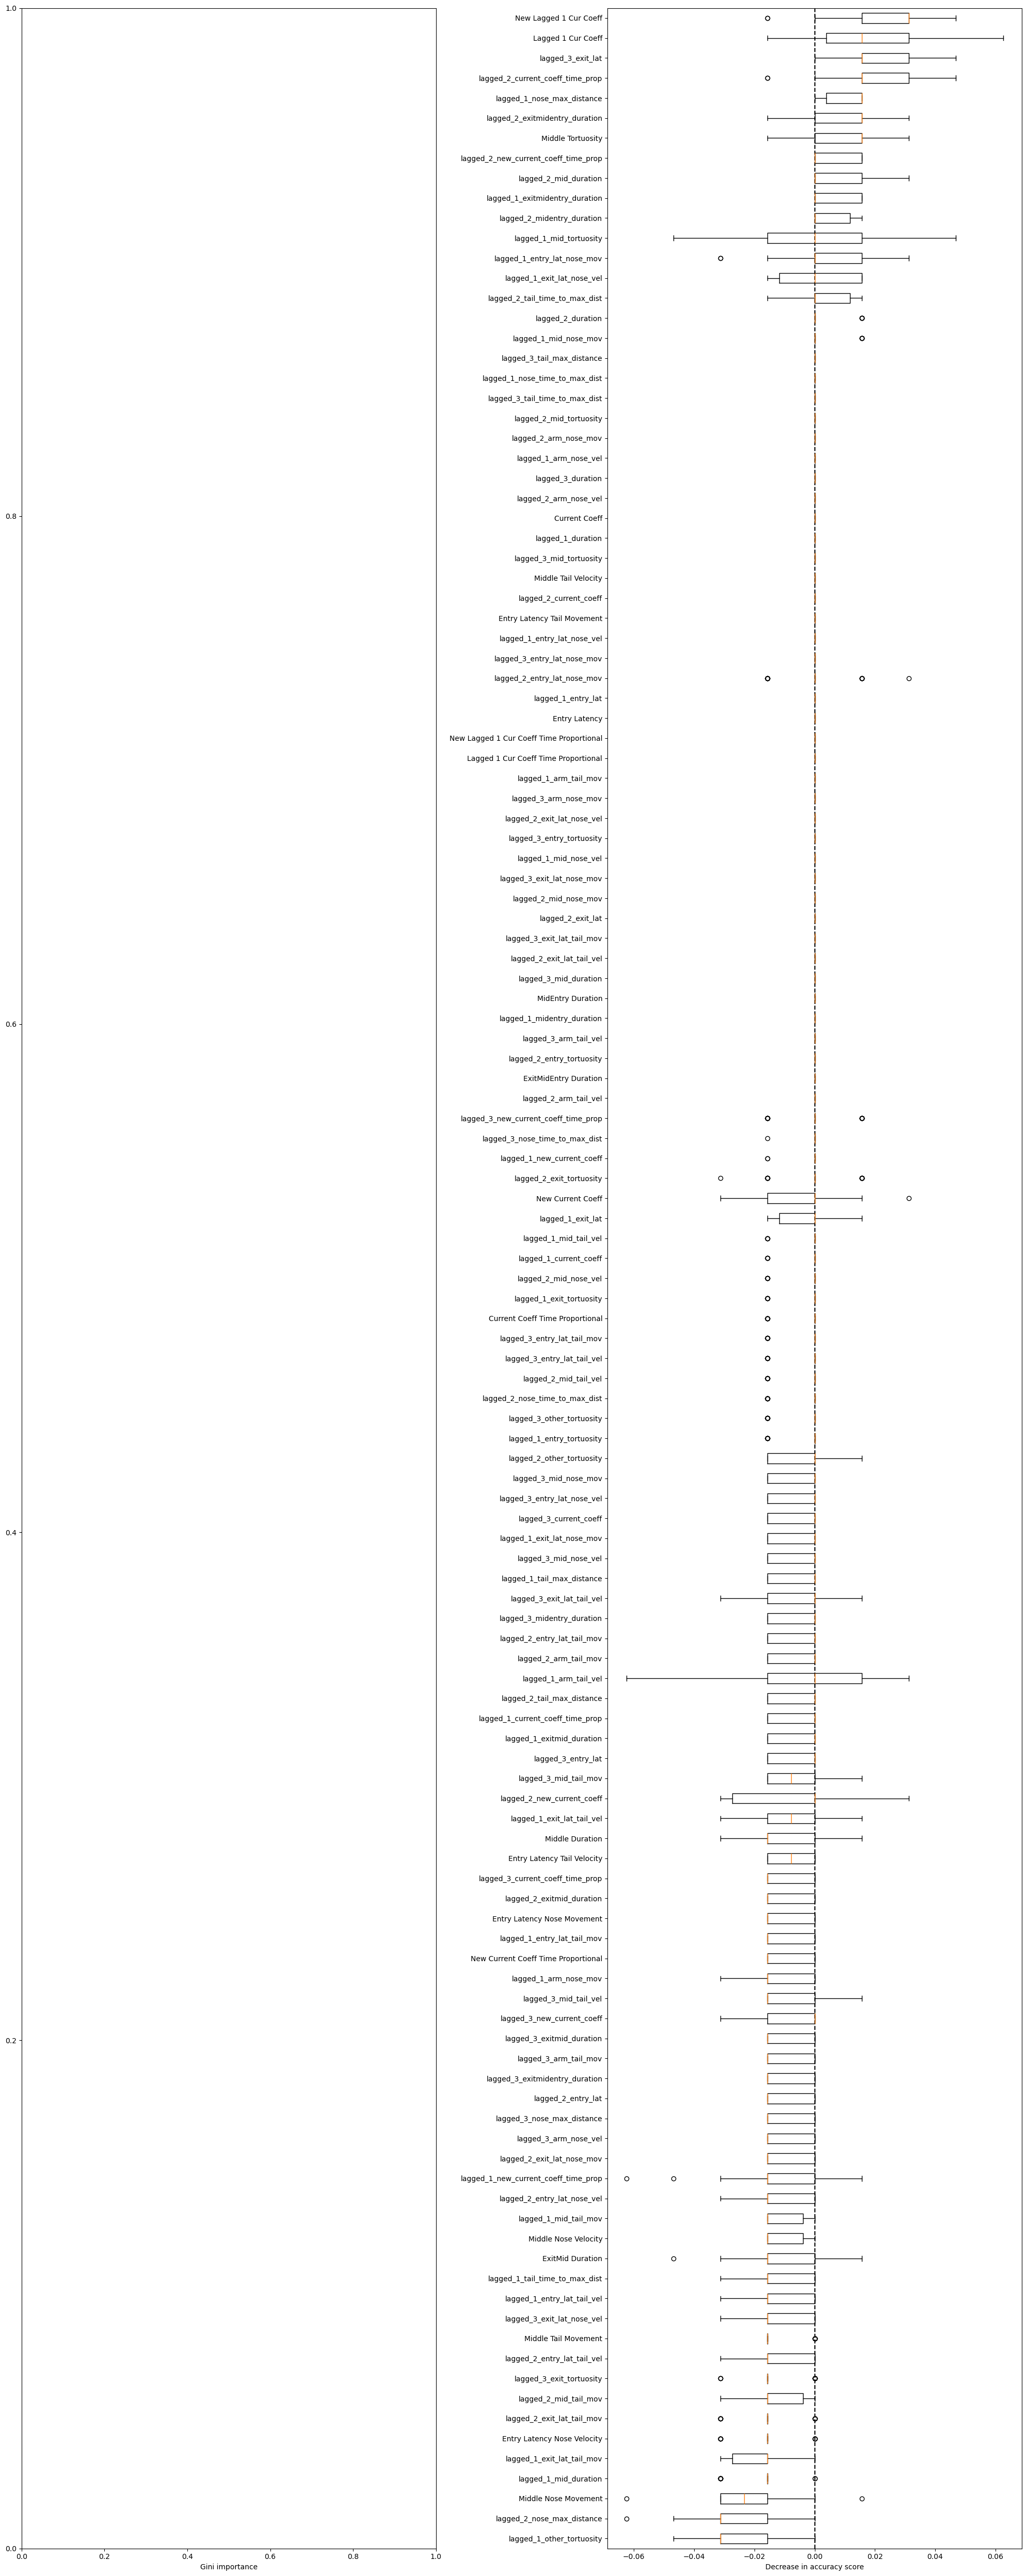

In [805]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_s_lag3, X_test_s_lag3, y_test_s_lag3, x_second_lag3,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# optimizing binary decision threshold low(127) vs high(192)

In [15]:
grouped_lagged_added_stats_ri_low = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']==2) | ((grouped_lagged_added_stats_ri['Choice Output']==3) & (grouped_lagged_added_stats_ri['lagged_1_choice_ago']>2))]

In [16]:
grouped_lagged_added_stats_ri_low

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.395349               0.279070               0.441860   
1           0.302326               0.395349               0.279070   
3           0.139535               0.279070               0.302326   
4           0.139535               0.139535               0.279070   
5           0.255814               0.139535               0.139535   
..               ...                    ...                    ...   
298         0.292453               0.485849               0.117925   
305         0.084906               0.075472               0.037736   
309         0.066038               0.141509               0.037736   
310         0.528302               0.066038               0.141509   
320         0.759434               0.216981               0.150943   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
0                 0.000000               0.000000              0.499066   
1                 0.441860               0.000000              0.291543   
3                 0.395349               0.279070              0.226293   
4                 0.302326               0.395349              0.212414   
5                 0.279070               0.302326              0.470011   
..                     ...                    ...                   ...   
298               0.089623               0.000000              0.305776   
305               0.014151               0.061321              0.163662   
309               0.084906               0.084906              0.096689   
310               0.037736               0.084906              0.648750   
320               0.004717               0.009434              0.833382   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
0                 0.443050               0.375489               0.000000   
1                 0.499066               0.443050               0.375489   
3                 0.239721               0.291543               0.499066   
4                 0.226293               0.239721               0.291543   
5                 0.212414               0.226293               0.239721   
..                     ...                    ...                    ...   
298               0.296705               0.183453               0.113333   
305               0.134791               0.049044               0.025347   
309               0.133200               0.105555               0.121430   
310               0.096689               0.133200               0.105555   
320               0.342442               0.224511               0.016390   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
0                 0.000000  ...                      1.986111   
1                 0.000000  ...                      2.430556   
3                 0.443050  ...                      2.319444   
4                 0.499066  ...                      2.500000   
5                 0.291543  ...                      2.569444   
..                     ...  ...                           ...   
298               0.011136  ...                      1.244373   
305               0.113172  ...                      0.726688   
309               0.163662  ...                      0.800643   
310               0.121430  ...                      1.218650   
320               0.029302  ...                      1.649518   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
0                             0.472222                           0.518519   
1                             0.458333                           0.462963   
3                             0.465278                           0.458333   
4                             0.541667                           0.527778   
5                             0.597222                           0.541667   
..                                 ...                                ...   
298                           

In [17]:
grouped_lagged_added_stats_ri_low['Binary'] = 0

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_46972\24646402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_low['Binary'] = 0


In [18]:
#grouped_lagged_added_stats_ri_2['Lagged 2 Cur Coeff'] = np.nan

In [19]:
grouped_lagged_added_stats_ri_high = grouped_lagged_added_stats_ri[(grouped_lagged_added_stats_ri['Choice Output']>3) | ((grouped_lagged_added_stats_ri['Choice Output']==3) & (grouped_lagged_added_stats_ri['lagged_1_choice_ago']==2))]

In [20]:
grouped_lagged_added_stats_ri_high

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
2           0.279070               0.302326               0.395349   
6           0.488372               0.255814               0.139535   
8           0.255814               0.279070               0.488372   
12          0.139535               0.139535               0.255814   
13          0.511628               0.139535               0.139535   
..               ...                    ...                    ...   
315         0.070755               0.028302               0.023585   
316         0.009434               0.070755               0.028302   
317         0.004717               0.009434               0.070755   
318         0.150943               0.004717               0.009434   
319         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  lagged_4_mid_duration  Middle Nose Movement  \
2                 0.279070               0.441860              0.239721   
6                 0.139535               0.279070              0.516920   
8                 0.255814               0.139535              0.460563   
12                0.116279               0.255814              0.261105   
13                0.255814               0.116279              0.493775   
..                     ...                    ...                   ...   
315               0.891509               0.103774              0.135402   
316               0.023585               0.891509              0.029302   
317               0.028302               0.023585              0.016390   
318               0.070755               0.028302              0.224511   
319               0.009434               0.070755              0.342442   

     lagged_1_mid_nose_mov  lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  \
2                 0.291543               0.499066               0.443050   
6                 0.470011               0.212414               0.226293   
8                 0.431110               0.516920               0.470011   
12                0.320118               0.378745               0.263726   
13                0.261105               0.320118               0.378745   
..                     ...                    ...                    ...   
315               0.059617               0.074648               1.000000   
316               0.135402               0.059617               0.074648   
317               0.029302               0.135402               0.059617   
318               0.016390               0.029302               0.135402   
319               0.224511               0.016390               0.029302   

     lagged_4_mid_nose_mov  ...  5_past_exitmidentry_duration  \
2                 0.375489  ...                      2.500000   
6                 0.239721  ...                      2.694444   
8                 0.212414  ...                      2.569444   
12                0.460563  ...                      1.777778   
13                0.263726  ...                      2.027778   
..                     ...  ...                           ...   
315               0.161598  ...                      1.363344   
316               1.000000  ...                      1.299035   
317               0.074648  ...                      0.565916   
318               0.059617  ...                      0.758842   
319               0.135402  ...                      1.102894   

     mean_2_past_exitmidentry_duration  mean_3_past_exitmidentry_duration  \
2                             0.472222                           0.472222   
6                             0.555556                           0.587963   
8                             0.402778                           0.458333   
12                            0.354167                           0.356481   
13                            0.506944                           0.449074   
..                                 ...                                ...   
315                           

In [21]:
grouped_lagged_added_stats_ri_high['Binary'] = 1

C:\Users\Josue Regalado\AppData\Local\Temp\ipykernel_46972\2828041089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_lagged_added_stats_ri_high['Binary'] = 1


In [22]:
grouped_lagged_lowhigh_dt = pd.concat([grouped_lagged_added_stats_ri_low, grouped_lagged_added_stats_ri_high])

In [23]:
grouped_lagged_lowhigh_dt_ri = grouped_lagged_lowhigh_dt.reset_index(drop=True)

In [24]:
x_lowhigh_dt = grouped_lagged_lowhigh_dt_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        'lagged_3_mid_duration', 'lagged_4_mid_duration', 'lagged_3_mid_nose_mov',
       'lagged_4_mid_nose_mov', 'lagged_3_mid_nose_vel', 'lagged_4_mid_nose_vel', 'lagged_3_mid_tail_mov',
       'lagged_4_mid_tail_mov', 'lagged_3_mid_tail_vel', 'lagged_4_mid_tail_vel', 'lagged_3_mid_tortuosity', 'lagged_4_mid_tortuosity',                                              
         'lagged_3_current_coeff', 'lagged_4_current_coeff', 'Lagged 3 Cur Coeff', 'Lagged 4 Cur Coeff', 'lagged_3_new_current_coeff', 
        'lagged_4_new_current_coeff',  'New Lagged 3 Cur Coeff', 'New Lagged 4 Cur Coeff',                                          
        'lagged_3_current_coeff_time_prop', 'lagged_4_current_coeff_time_prop', 'Lagged 3 Cur Coeff Time Proportional',                                               
         'Lagged 4 Cur Coeff Time Proportional',  'lagged_3_new_current_coeff_time_prop',
       'lagged_4_new_current_coeff_time_prop', 'New Lagged 3 Cur Coeff Time Proportional',  'New Lagged 4 Cur Coeff Time Proportional',                                            
       'lagged_3_entry_lat',
       'lagged_4_entry_lat', 'lagged_3_entry_lat_nose_mov', 'lagged_4_entry_lat_nose_mov', 'lagged_3_entry_lat_nose_vel',
       'lagged_4_entry_lat_nose_vel', 'lagged_3_entry_lat_tail_mov', 'lagged_4_entry_lat_tail_mov','lagged_3_entry_lat_tail_vel',
       'lagged_4_entry_lat_tail_vel', 'lagged_3_duration', 'lagged_4_duration', 'lagged_3_nose_max_distance',
       'lagged_4_nose_max_distance', 'lagged_3_nose_time_to_max_dist', 'lagged_4_nose_time_to_max_dist', 'lagged_3_tail_max_distance',
       'lagged_4_tail_max_distance', 'lagged_3_tail_time_to_max_dist', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_3_arm_nose_mov', 'lagged_4_arm_nose_mov', 'lagged_3_arm_nose_vel', 'lagged_4_arm_nose_vel',                                                 
        'lagged_3_arm_tail_mov', 'lagged_4_arm_tail_mov', 'lagged_3_arm_tail_vel', 'lagged_4_arm_tail_vel','lagged_3_entry_tortuosity',
       'lagged_4_entry_tortuosity', 'lagged_3_exit_tortuosity', 'lagged_4_exit_tortuosity', 'lagged_3_other_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_3_exit_lat', 'lagged_4_exit_lat', 'lagged_3_exit_lat_nose_mov',
       'lagged_4_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_vel', 'lagged_4_exit_lat_nose_vel', 'lagged_3_exit_lat_tail_mov',
       'lagged_4_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_vel', 'lagged_4_exit_lat_tail_vel','lagged_3_exitmid_duration',
       'lagged_4_exitmid_duration','lagged_3_midentry_duration', 'lagged_4_midentry_duration', 'lagged_3_exitmidentry_duration',
       'lagged_4_exitmidentry_duration', 'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional'                                             
                                                        
                                                        ])


In [25]:
x_lowhigh_dt.columns

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'Middle Nose Movement', 'lagged_1_mid_nose_mov',
       'lagged_2_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'Middle Tail Movement', 'lagged_1_mid_tail_mov',
       'lagged_2_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel', 'Middle Tortuosity',
       'lagged_1_mid_tortuosity', 'lagged_2_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'Lagged 1 Cur Coeff', 'New Current Coeff', 'lagged_1_new_current_coeff',
       'lagged_2_new_current_coeff', 'New Lagged 1 Cur Coeff',
       'Current Coeff Time Proportional', 'lagged_1_current_coeff_time_prop',
       'lagged_2_current_coeff_time_prop',
       'Lagged 1 Cur Coeff Time Proportional',
       'New Current Coeff Time Proportional',
       'lagged_1_new_current_coeff_time_prop',
       'lagged_2_new_cur

In [26]:
x_lh_dt = x_lowhigh_dt.values

In [27]:
y_lh_dt = grouped_lagged_lowhigh_dt_ri['Binary'].values

In [28]:
X_train_lh_dt, X_test_lh_dt, y_train_lh_dt, y_test_lh_dt = train_test_split(x_lh_dt, y_lh_dt, test_size=0.5, random_state=9)

In [893]:
mod_lh_dt =  HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=20, random_state=57)
mod_lh_dt.fit(X_train_lh_dt, y_train_lh_dt)
hg_lh_probs = mod_lh_dt.predict_proba(X_test_lh_dt)
hg_lh_probs_pos = hg_lh_probs[:,1]





#y_pred_lh=mod_lh.predict(X_test_lh)

array([[0.21861683, 0.78138317],
       [0.35304033, 0.64695967],
       [0.14134255, 0.85865745],
       [0.07249077, 0.92750923],
       [0.44953221, 0.55046779],
       [0.54134939, 0.45865061],
       [0.28713051, 0.71286949],
       [0.06714431, 0.93285569],
       [0.17055499, 0.82944501],
       [0.46461343, 0.53538657],
       [0.09529888, 0.90470112],
       [0.05570572, 0.94429428],
       [0.04607224, 0.95392776],
       [0.01208577, 0.98791423],
       [0.61460069, 0.38539931],
       [0.12334458, 0.87665542],
       [0.33510962, 0.66489038],
       [0.8758599 , 0.1241401 ],
       [0.57957753, 0.42042247],
       [0.38025677, 0.61974323],
       [0.24393538, 0.75606462],
       [0.18317499, 0.81682501],
       [0.00274977, 0.99725023],
       [0.58230333, 0.41769667],
       [0.53602818, 0.46397182],
       [0.7304772 , 0.2695228 ],
       [0.01037306, 0.98962694],
       [0.19915398, 0.80084602],
       [0.01627769, 0.98372231],
       [0.14318467, 0.85681533],
       [0.

In [894]:
from sklearn.metrics import roc_curve

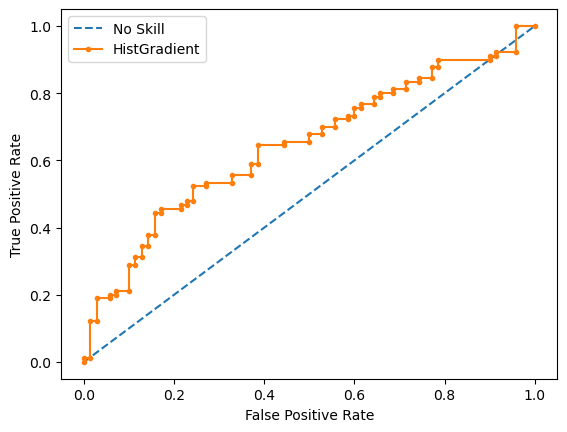

In [895]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test_lh_dt, hg_lh_probs_pos)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='HistGradient')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.728340, G-Mean=0.629


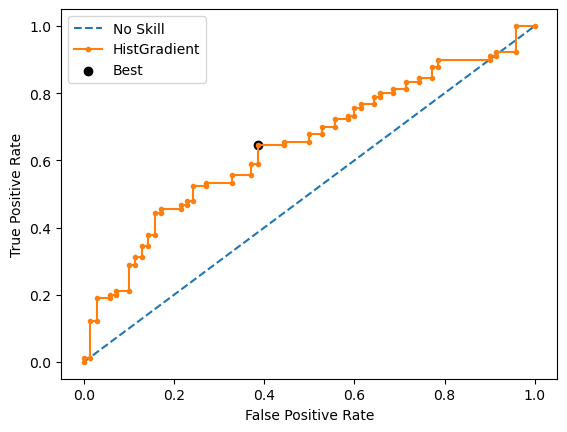

In [899]:
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='HistGradient')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [901]:
fpr[ix], tpr[ix]

(0.38571428571428573, 0.6444444444444445)

In [902]:
from sklearn.metrics import precision_recall_curve

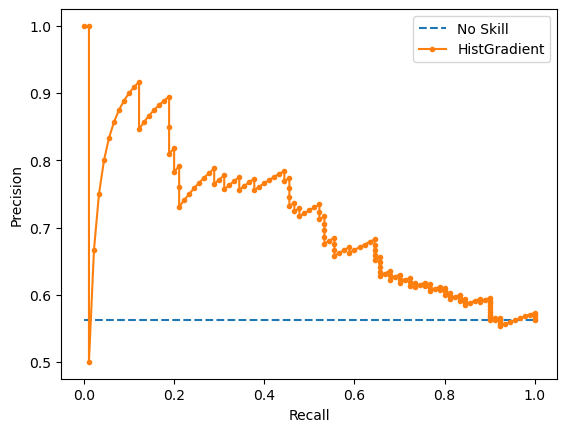

In [903]:
precision, recall, thresholds = precision_recall_curve(y_test_lh_dt, hg_lh_probs_pos)
# plot the roc curve for the model
no_skill = len(y_test_lh_dt[y_test_lh_dt==1]) / len(y_test_lh_dt)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='HistGradient')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.124140, F-Score=0.729


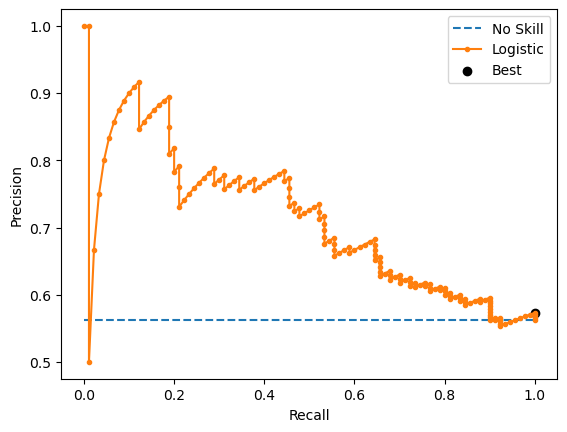

In [931]:
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test_lh_dt[y_test_lh_dt==1]) / len(y_test_lh_dt)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [908]:
ix = np.argmax(fscore)

In [909]:
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.124140, F-Score=0.729


In [5]:
from sklearn.model_selection import TunedThresholdClassifierCV
from sklearn.metrics import make_scorer

In [32]:
pos_label = 0
scorer = make_scorer(f1_score, pos_label=pos_label)
model = HistGradientBoostingClassifier(learning_rate = 0.1, validation_fraction=0.1, n_iter_no_change=20, random_state=57)
model.fit(X_train_lh_dt, y_train_lh_dt) 

HistGradientBoostingClassifier(n_iter_no_change=20, random_state=57)

In [33]:
y_pred_untuned = model.predict(X_test_lh_dt)

In [35]:
print(classification_report(y_test_lh_dt,y_pred_untuned))

              precision    recall  f1-score   support

           0       0.56      0.33      0.41        70
           1       0.61      0.80      0.69        90

    accuracy                           0.59       160
   macro avg       0.58      0.56      0.55       160
weighted avg       0.59      0.59      0.57       160



In [ ]:
model_tuned = TunedThresholdClassifierCV(model, scoring='')
model_tuned.fit(X_train_lh_dt, y_train_lh_dt)

In [ ]:
y_pred_tuned = model_tuned.predict(X_test_lh_dt)

In [ ]:
mod_bin.n_iter_

In [ ]:
target_names = ['0', '1']

In [ ]:
f1_sc_lh = f1_score(y_test_lh, y_pred_lh, average = 'weighted')
f1_sc_lh

In [ ]:
p_sc_lh = precision_score(y_test_lh, y_pred_lh, average = 'weighted')
p_sc_lh

In [ ]:
cf_matrix_lh = confusion_matrix(y_test_lh, y_pred_lh)
cf_matrix_lh

In [ ]:
print(classification_report(y_test_lh, y_pred_lh, target_names=target_names))

In [ ]:
#mdi_importances_bin= pd.Series(mod_bin.feature_importances_, index=x_binary_main.columns)
#tree_importance_sorted_idx_bin = np.argsort(mod_bin.feature_importances_)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 50))
#mdi_importances_bin.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(mod_lh, X_test_lh, y_test_lh, x_lowhigh,ax2)
ax2.set_xlabel("Decrease in accuracy score")
#fig.suptitle(
#    "Impurity-based vs. permutation importances on multicollinear features (train set)"
#)
_ = fig.tight_layout()


#plt.savefig('Impurity-based_vs_permutation importances.png')

# second option as above, optimizing decision threshold

In [807]:
x_second_lag3

Middle Duration  lagged_1_mid_duration  lagged_2_mid_duration  \
0           0.255814               0.139535               0.139535   
1           0.116279               0.255814               0.279070   
2           0.255814               0.116279               0.255814   
3           0.139535               0.255814               0.116279   
4           0.813953               0.162791               0.116279   
..               ...                    ...                    ...   
314         0.070755               0.028302               0.023585   
315         0.009434               0.070755               0.028302   
316         0.004717               0.009434               0.070755   
317         0.150943               0.004717               0.009434   
318         0.216981               0.150943               0.004717   

     lagged_3_mid_duration  Middle Nose Movement  lagged_1_mid_nose_mov  \
0                 0.279070              0.470011               0.212414   
1                 0.488372              0.263726               0.460563   
2                 0.279070              0.378745               0.263726   
3                 0.255814              0.320118               0.378745   
4                 0.162791              0.712284               0.311462   
..                     ...                   ...                    ...   
314               0.891509              0.135402               0.059617   
315               0.023585              0.029302               0.135402   
316               0.028302              0.016390               0.029302   
317               0.070755              0.224511               0.016390   
318               0.009434              0.342442               0.224511   

     lagged_2_mid_nose_mov  lagged_3_mid_nose_mov  Middle Nose Velocity  \
0                 0.226293               0.239721              0.592864   
1                 0.431110               0.516920              0.731853   
2                 0.460563               0.431110              0.477744   
3                 0.263726               0.460563              0.740286   
4                 0.275235               0.341940              0.282375   
..                     ...                    ...                   ...   
314               0.074648               1.000000              0.550750   
315               0.059617               0.074648              0.893915   
316               0.135402               0.059617              1.000000   
317               0.029302               0.135402              0.428064   
318               0.016390               0.029302              0.454204   

     lagged_1_mid_nose_vel  ...  lagged_2_exitmid_duration  \
0                 0.491215  ...                   0.280702   
1                 0.580947  ...                   0.333333   
2                 0.731853  ...                   0.333333   
3                 0.477744  ...                   0.210526   
4                 0.617373  ...                   0.245614   
..                     ...  ...                        ...   
314               0.606237  ...                   0.083942   
315               0.550750  ...                   0.065693   
316               0.893915  ...                   0.109489   
317               1.000000  ...                   0.054745   
318               0.428064  ...                   0.065693   

     lagged_3_exitmid_duration  MidEntry Duration  lagged_1_midentry_duration  \
0                     0.350877           0.581818                    0.672727   
1                     0.526316           0.290909                    0.363636   
2                     0.333333           0.345455                    0.290909   
3                     0.333333           0.290909                    0.345455   
4                     0.245614           0.909091                    0.309091   
..                         ...                ...                         ...   
314                   0.897810           0.100402 

In [808]:
x_s_lag3 = x_second_lag3.values

In [809]:
y_s_lag3 = grouped_lagged_second_lag3_ri['Binary'].values

In [864]:
X_train_s_lag3_dt, X_test_s_lag3_dt, y_train_s_lag3_dt, y_test_s_lag3_dt = train_test_split(x_s_lag3, y_s_lag3, test_size=0.2, random_state=10)

In [865]:
mod_dt =  HistGradientBoostingClassifier(learning_rate = 0.05, validation_fraction=0.1, n_iter_no_change=50, random_state=56)
mod_dt.fit(X_train_s_lag3_dt, y_train_s_lag3_dt)
hg_probs = mod_dt.predict_proba(X_test_s_lag3_dt)
hg_probs_pos = hg_probs[:,1]

In [866]:
hg_probs[:,0][0:10]

array([8.37459359e-03, 1.77603326e-03, 8.38284244e-01, 2.97458712e-01,
       2.57278651e-02, 5.71922584e-01, 4.63022505e-04, 2.22866447e-03,
       1.99612757e-02, 4.18121428e-03])

In [867]:
hg_probs[:,1][0:10]

array([0.06227133, 0.63639149, 0.00433951, 0.30273686, 0.02761051,
       0.12163061, 0.02249499, 0.01864704, 0.67016539, 0.04824363])

In [868]:
hg_probs[:,2][0:10]

array([0.92935408, 0.36183247, 0.15737625, 0.39980443, 0.94666162,
       0.30644681, 0.97704198, 0.9791243 , 0.30987333, 0.94757516])

In [870]:
y_test_s_lag3_dt[0:10]

array([1, 2, 1, 1, 2, 0, 2, 2, 2, 2], dtype=int64)